In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score




from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import BaseEstimator,TransformerMixin


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
! pip install xgboost
from xgboost import XGBClassifier



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Input/Attrition.csv")
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")
df.head(5)

The data has 1470 rows and 35 columns


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [7]:
print(f"Sum of the duplicate data in the dataframe is {df.duplicated().sum()}")

Sum of the duplicate data in the dataframe is 0


In [8]:
print(f"Sum of the missing values in the dataframe by features \n{df.isna().sum()}")

Sum of the missing values in the dataframe by features 
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany

# Univariate Analysis

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

 Heuristic: If a feature has fewer than or equal to a certain threshold of unique values (e.g., 10-20), it can often be considered categorical.
 - If nunique is less than or equal to 10-20, consider the feature as categorical.
 - If nunique is greater than 20, consider the feature as numerical.
 - This threshold can be adjusted based on the specific dataset and domain knowledge.

In [10]:
# Define the threshold for categorical vs numerical

threshold = 10

# Identify categorical and numerical features

categorical_features = [col for col in df.columns if df[col].nunique() <= threshold]
numerical_features = [col for col in df.columns if df[col].nunique() > threshold]

print(f"Categorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")

Categorical Features: ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
Numerical Features: ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


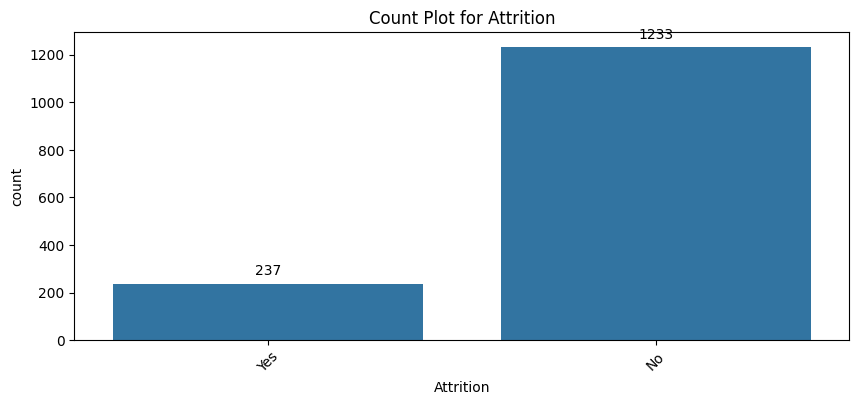

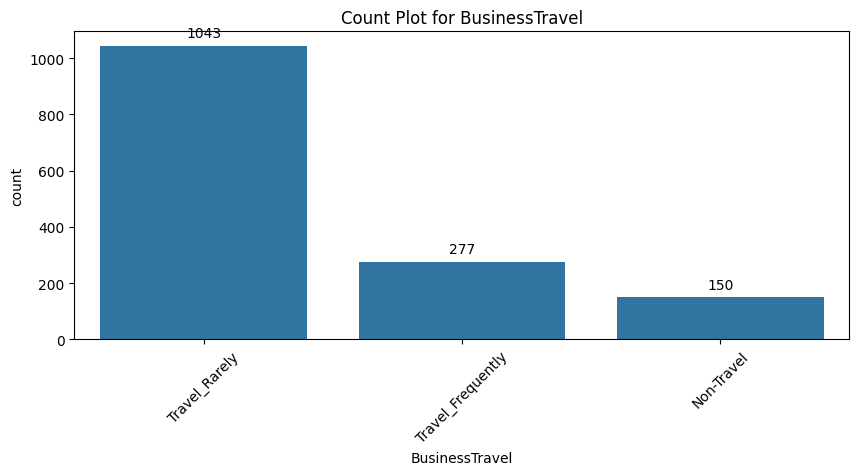

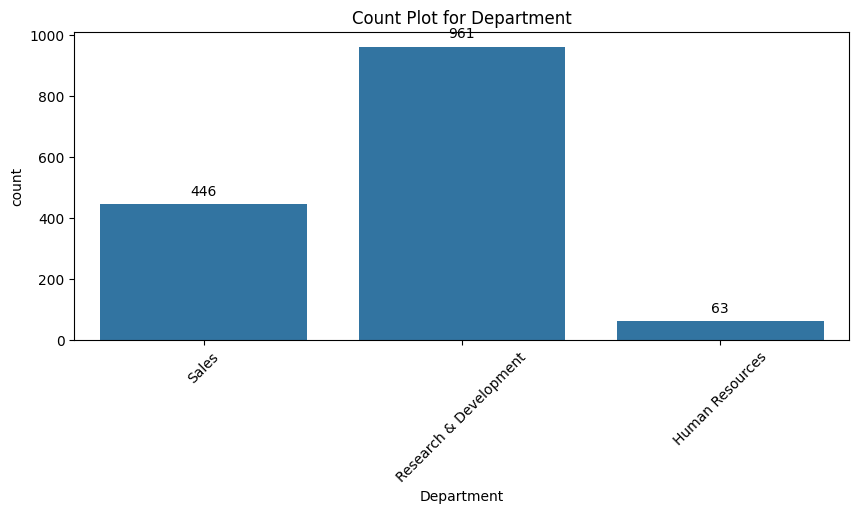

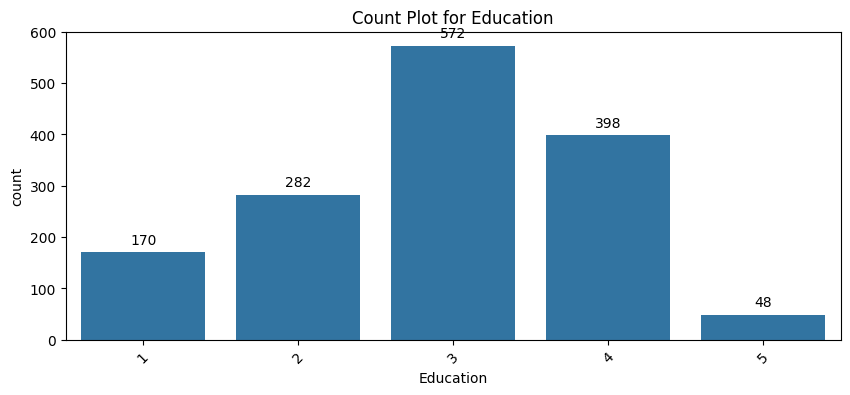

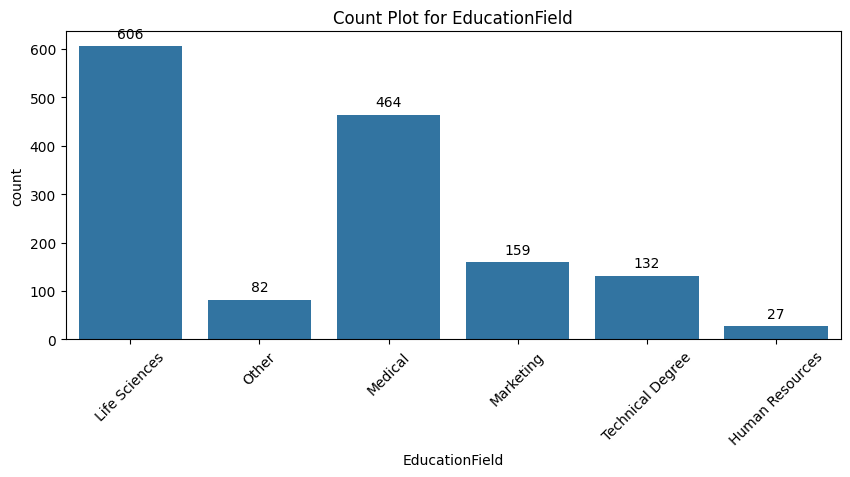

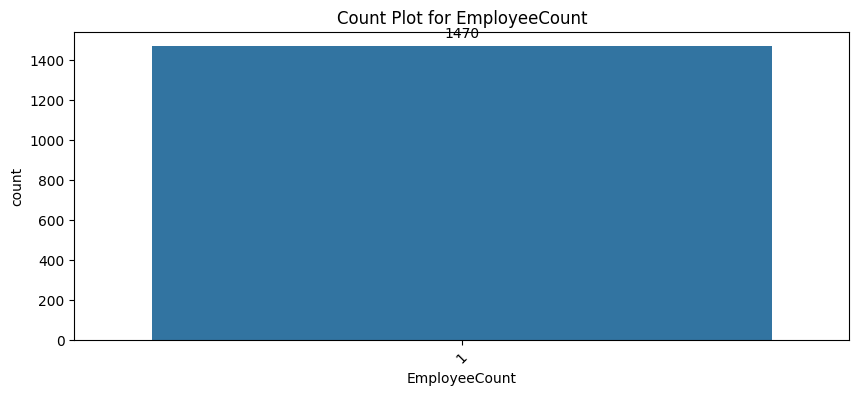

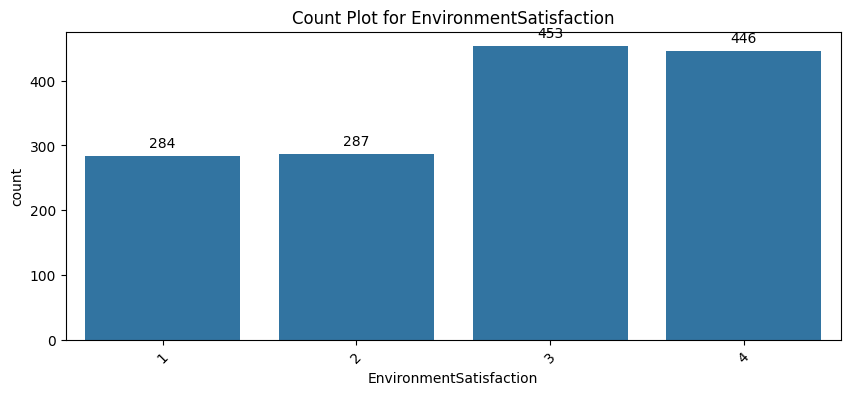

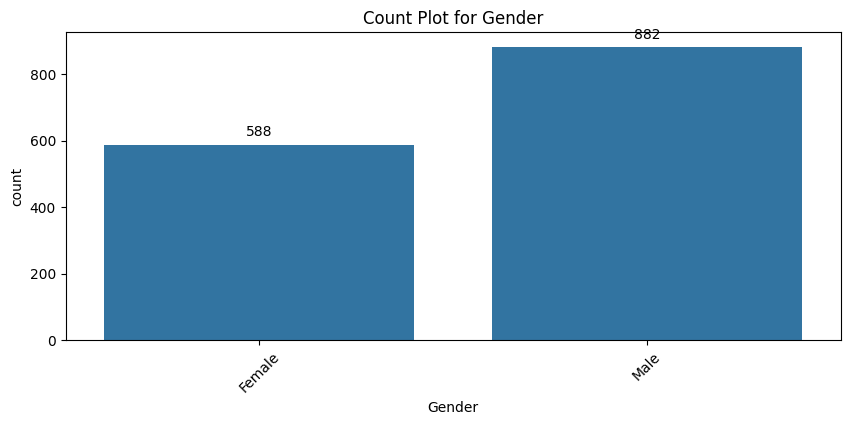

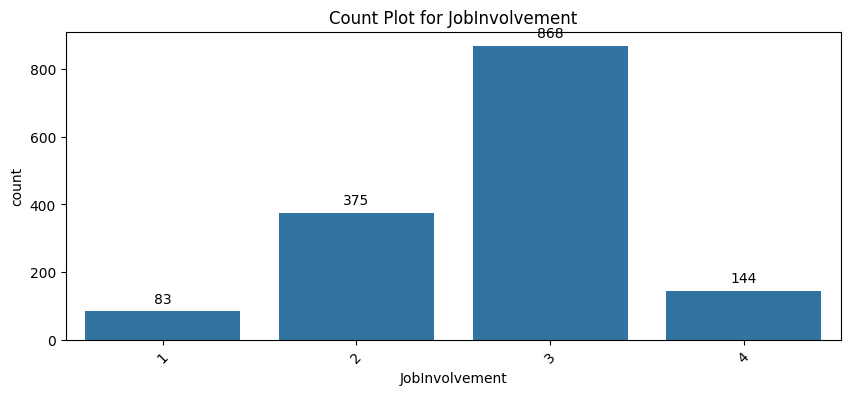

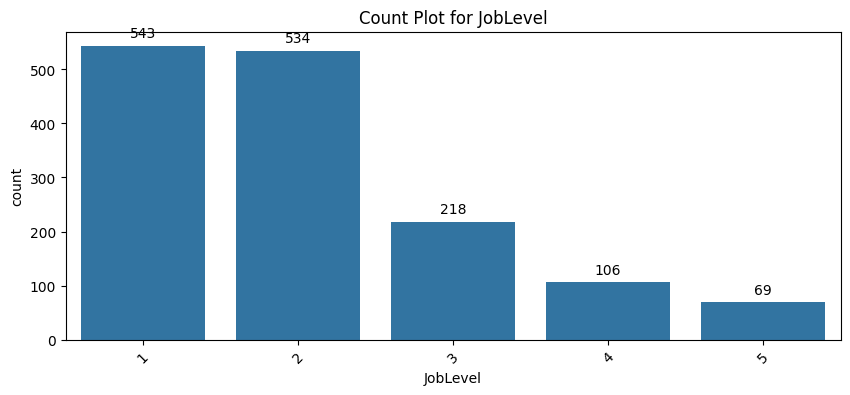

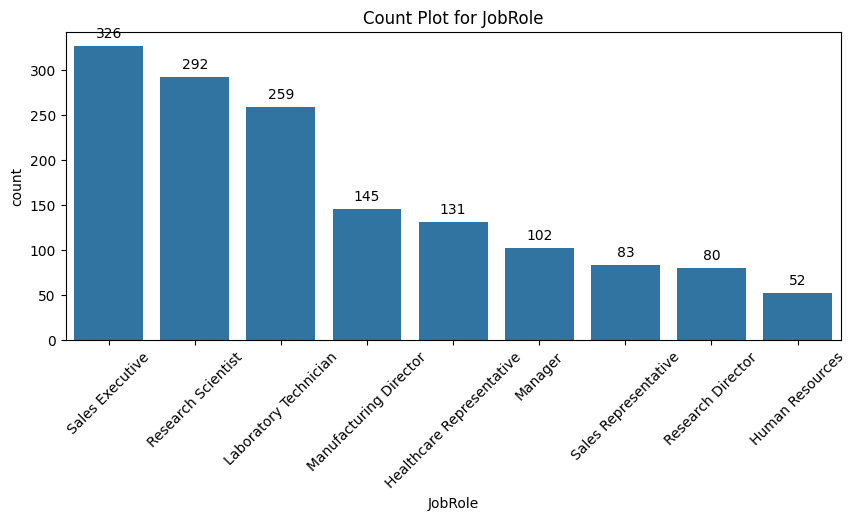

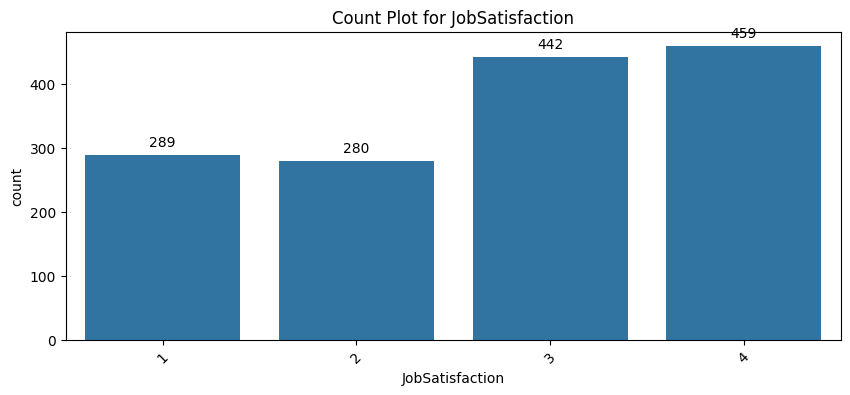

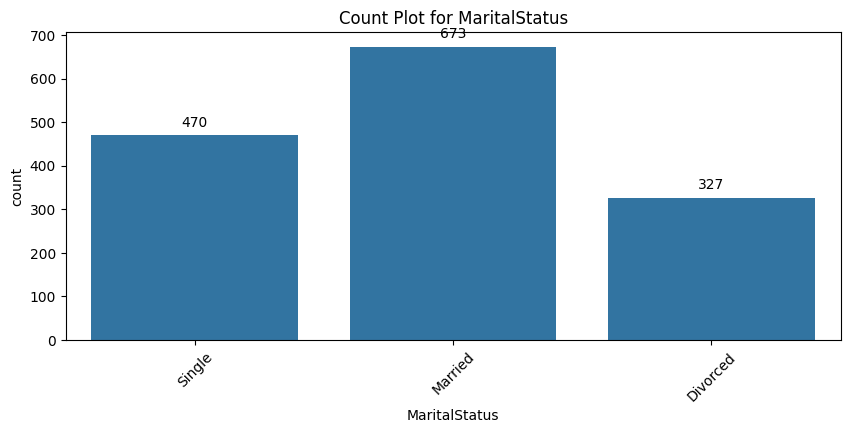

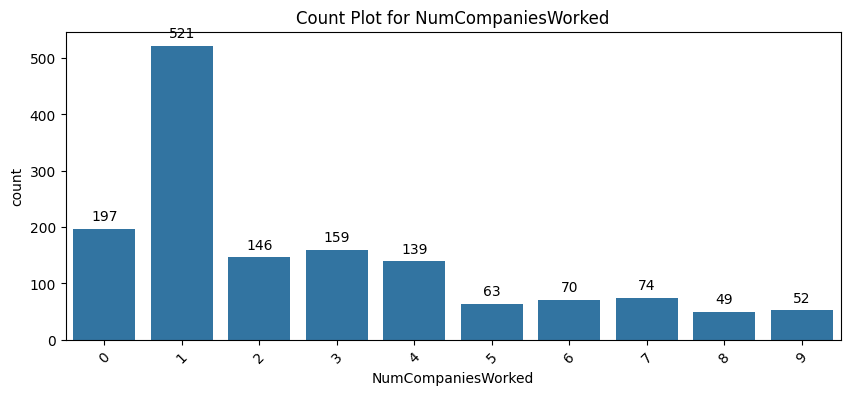

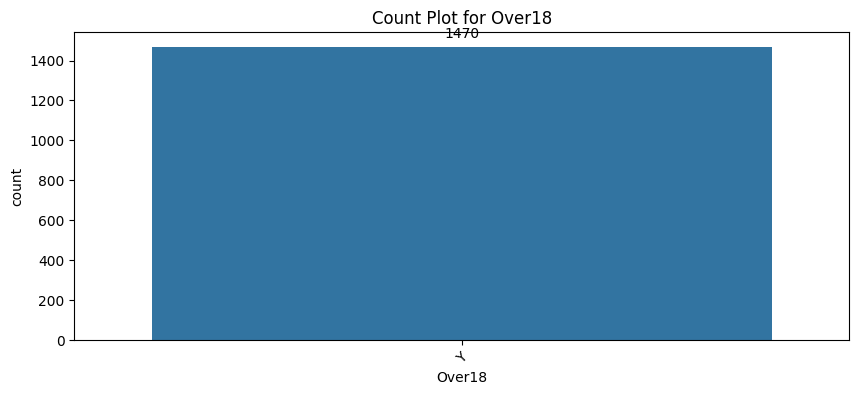

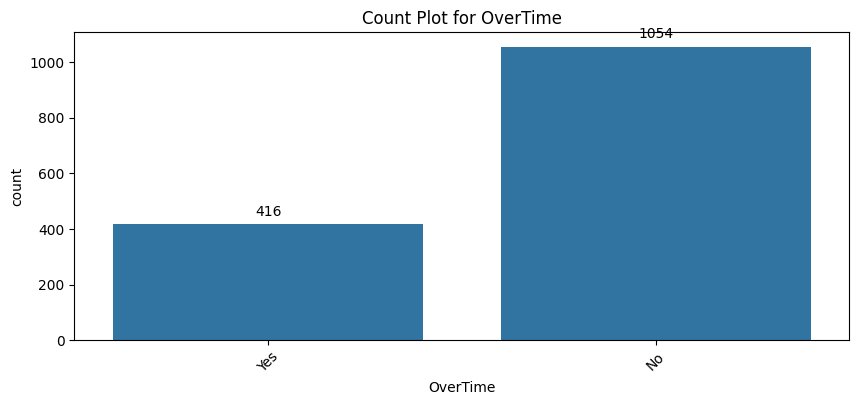

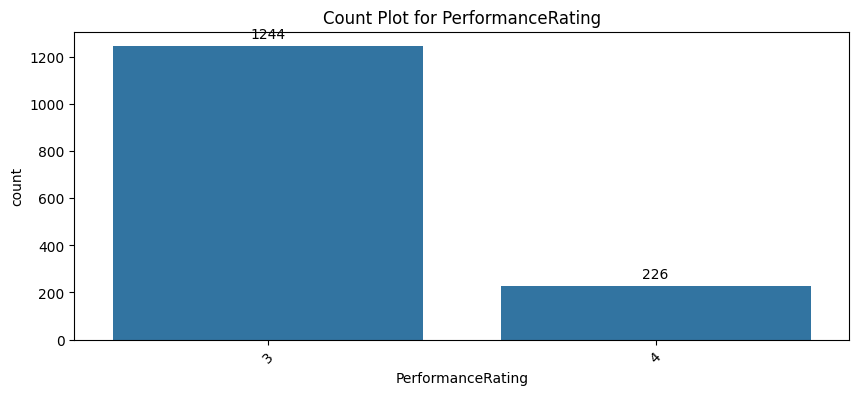

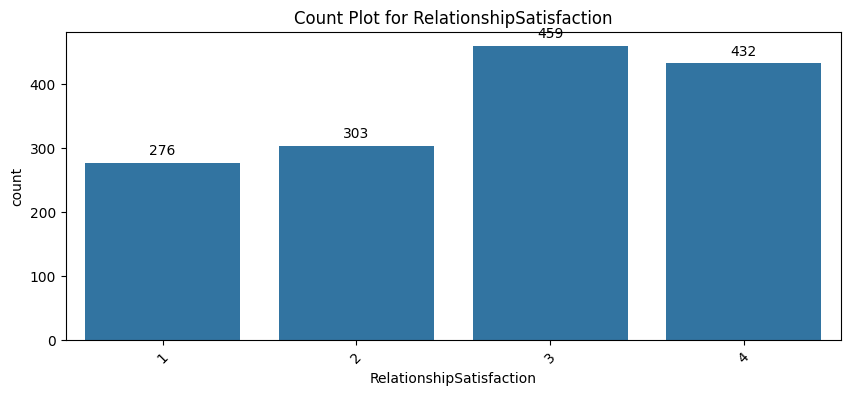

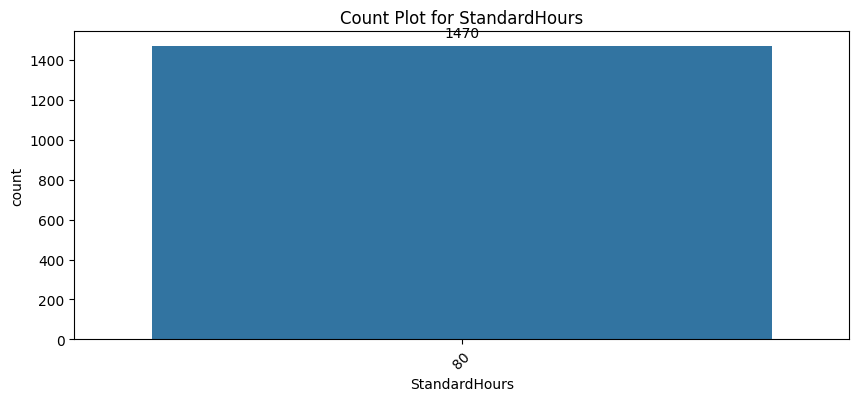

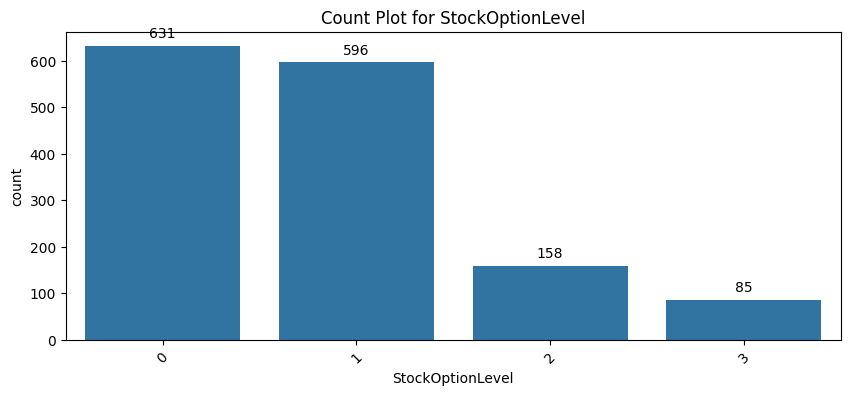

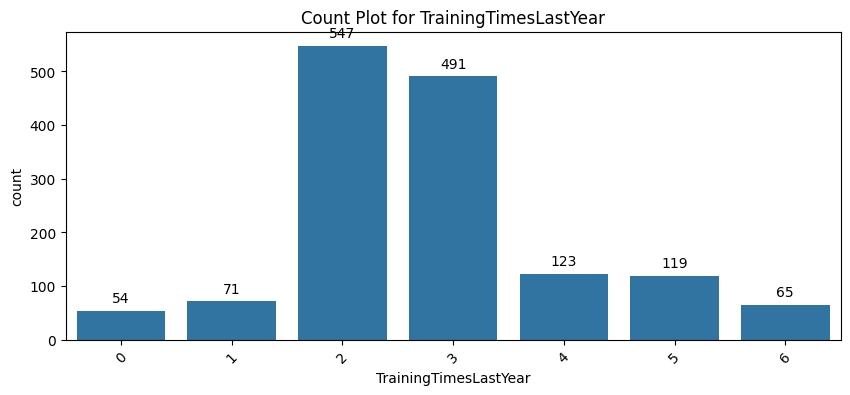

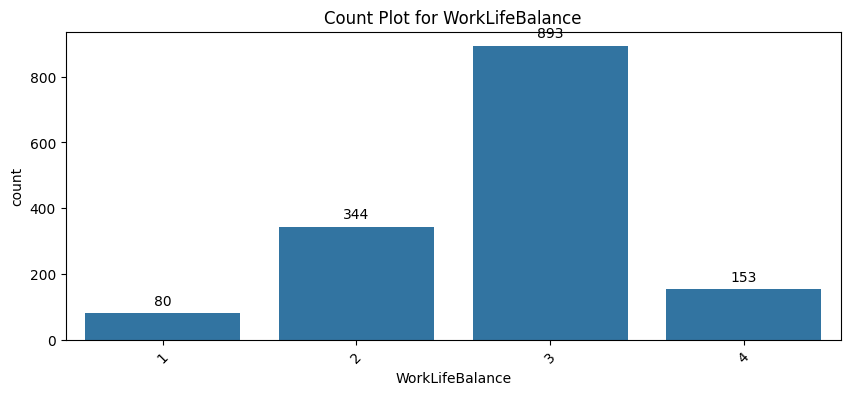

In [11]:
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)

    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.show()

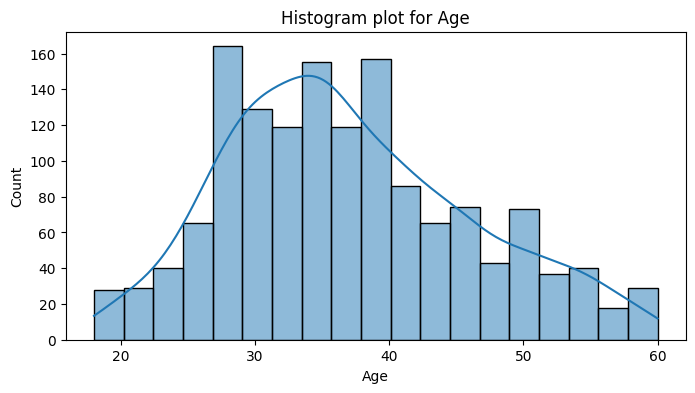

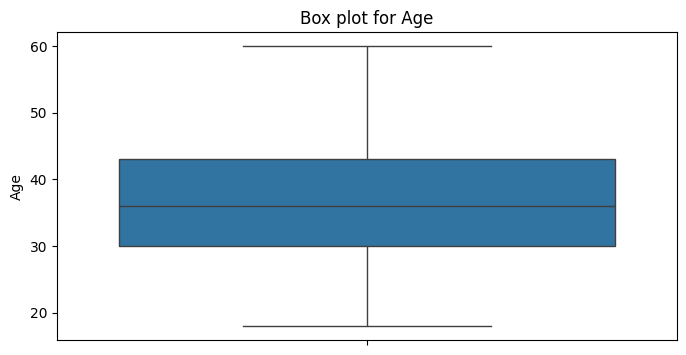

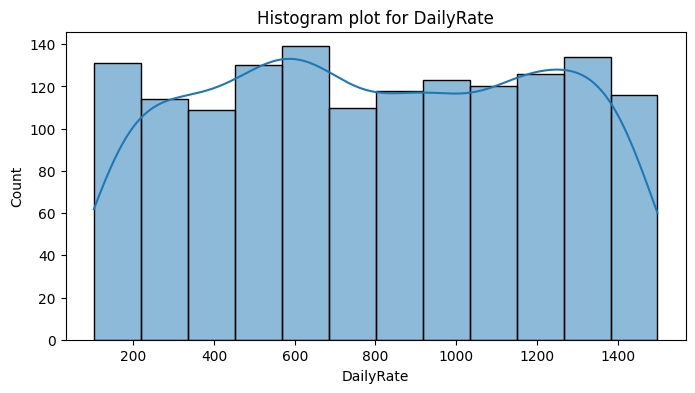

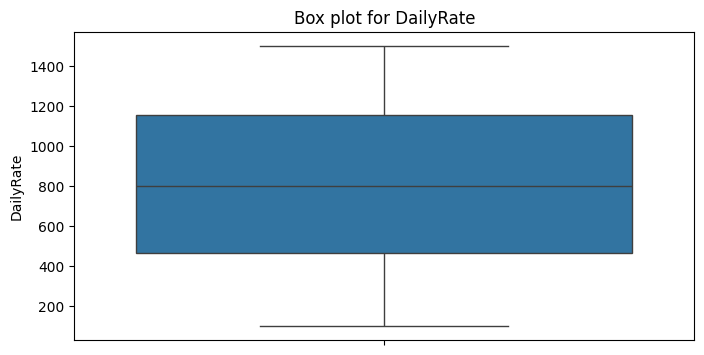

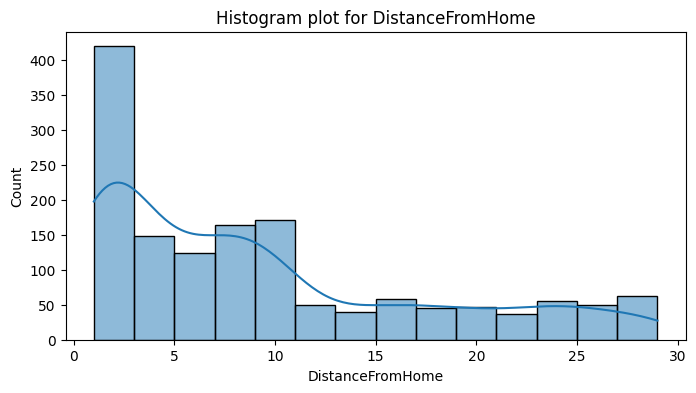

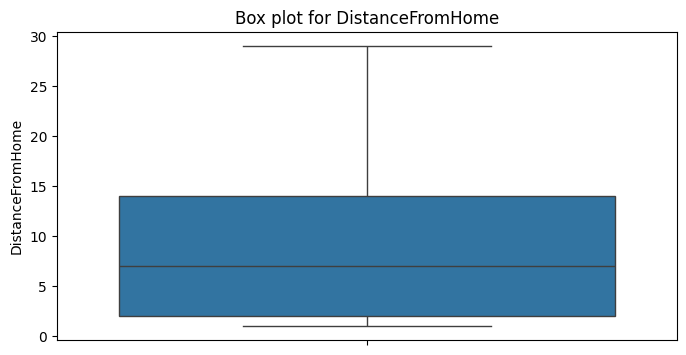

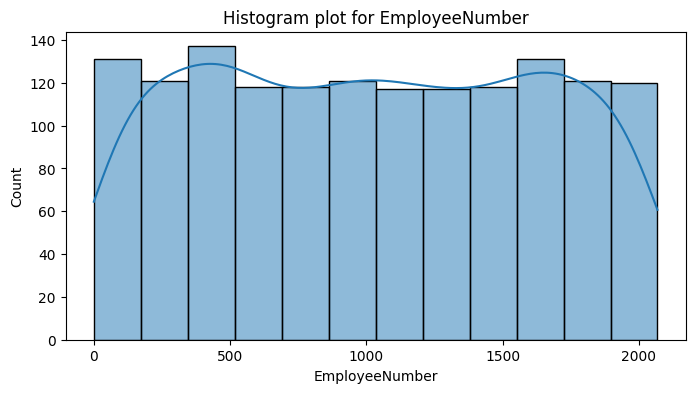

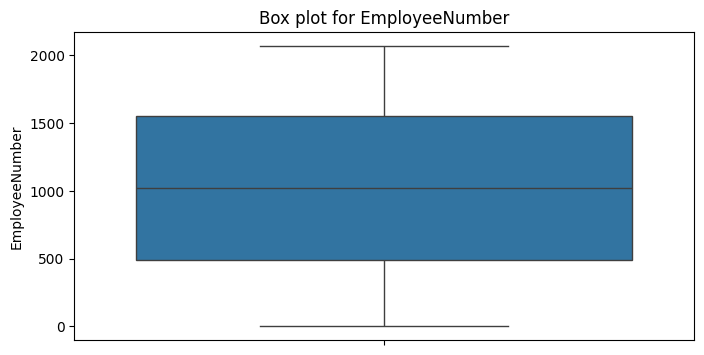

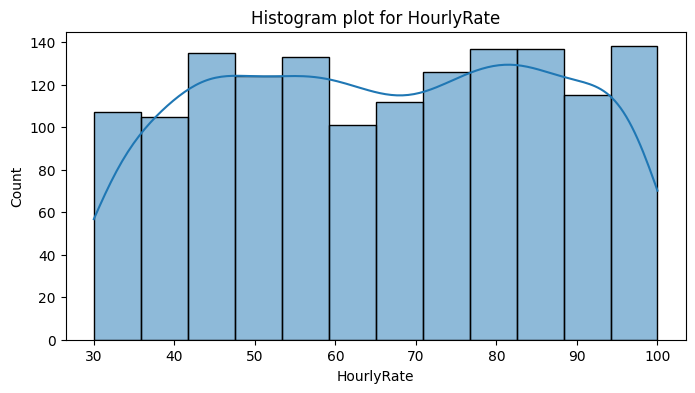

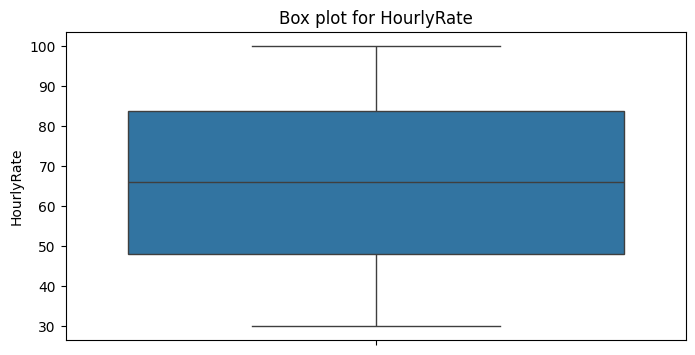

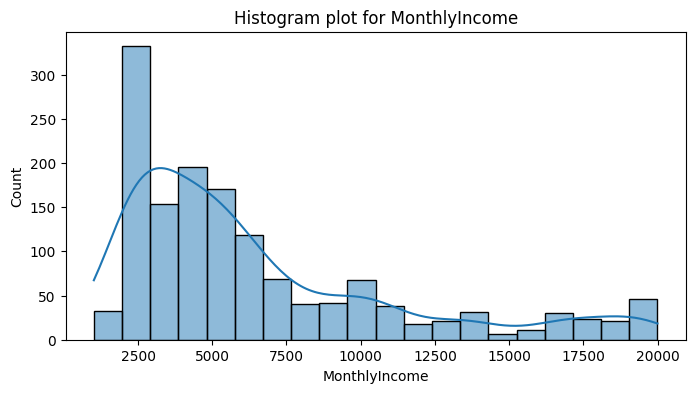

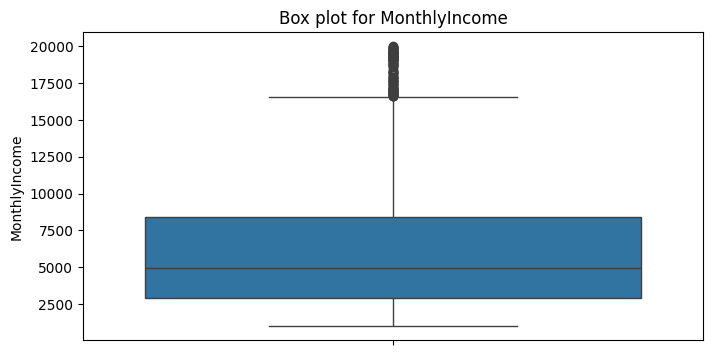

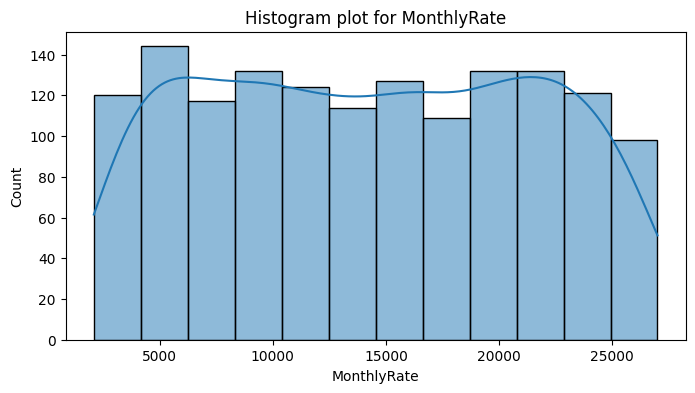

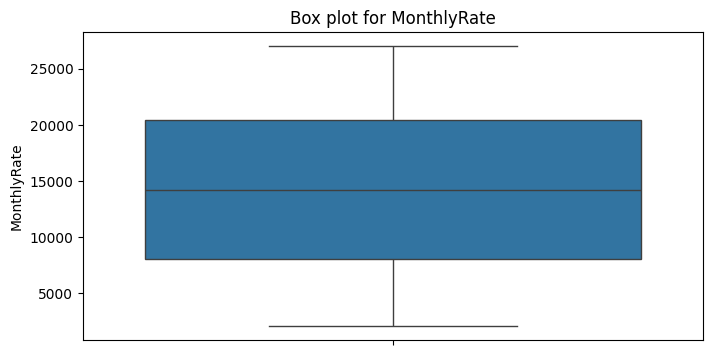

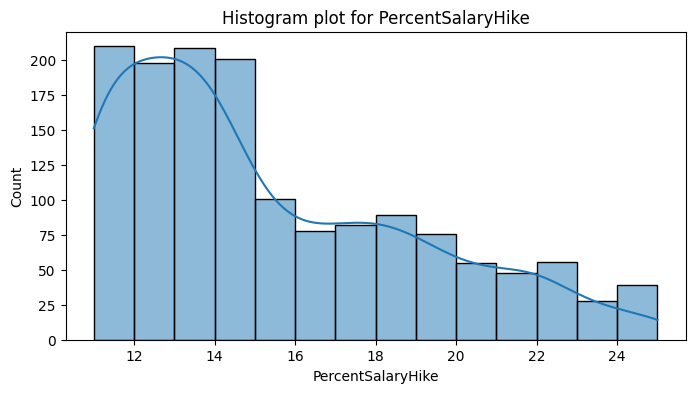

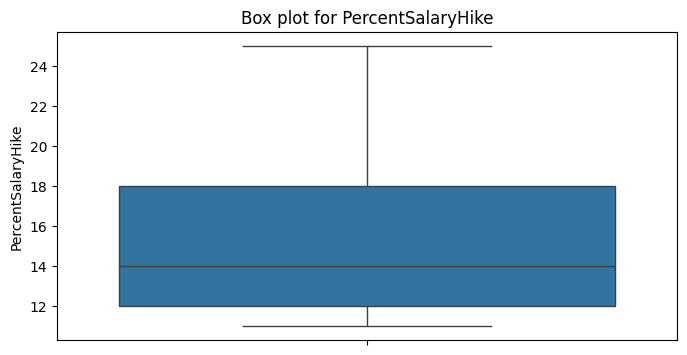

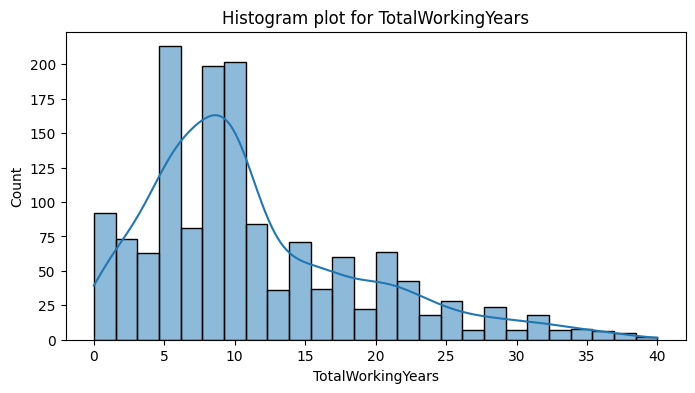

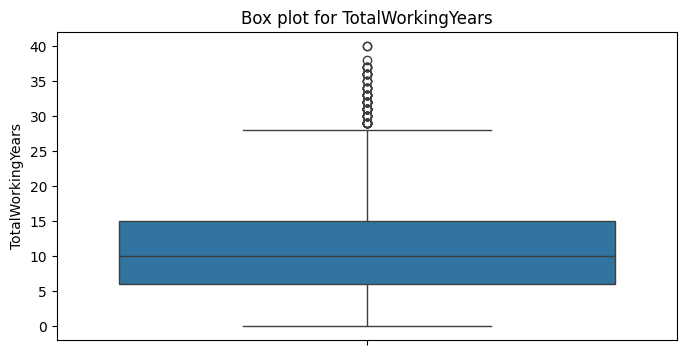

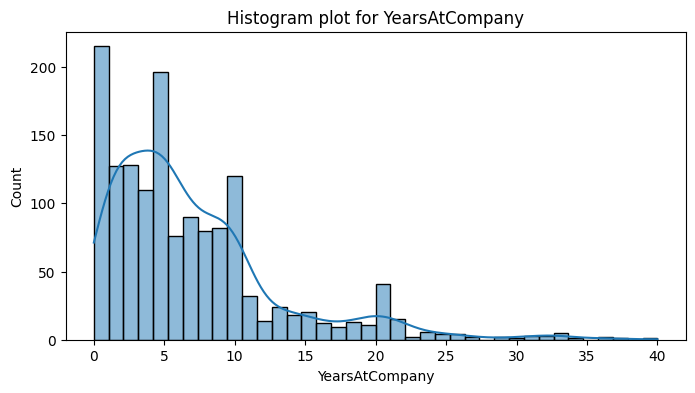

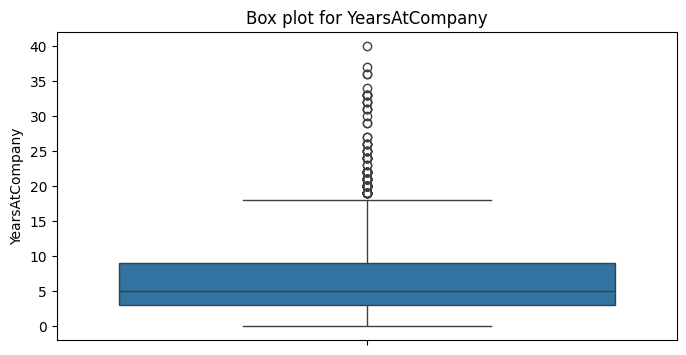

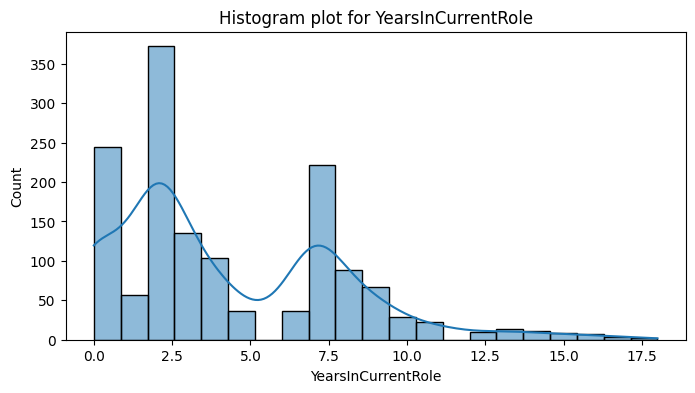

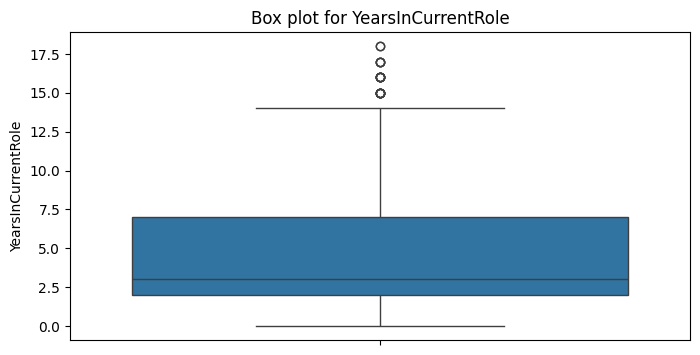

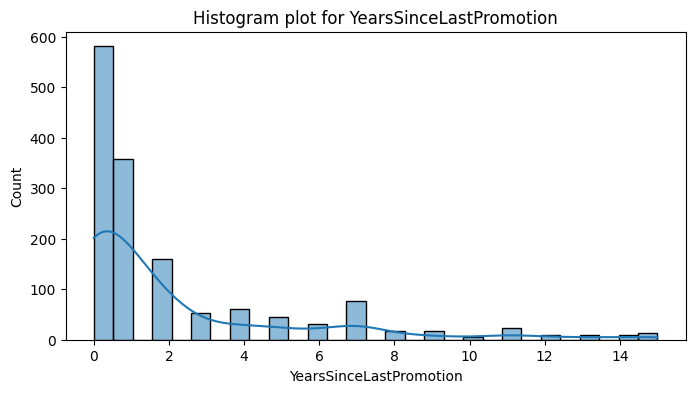

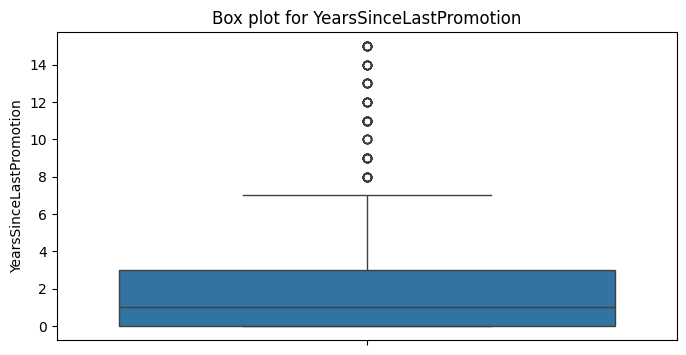

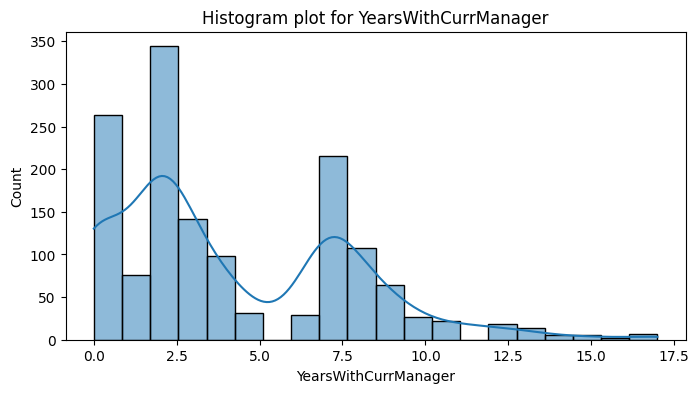

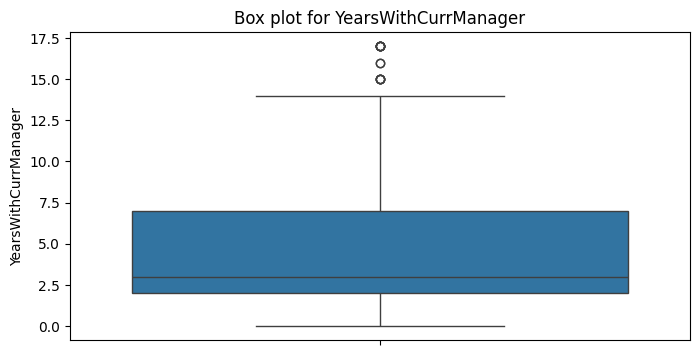

In [12]:
for col in numerical_features:
  plt.figure(figsize=(8,4))
  sns.histplot(df[col],kde=True)
  plt.title(f"Histogram plot for {col}")
  plt.show()

  plt.figure(figsize=(8,4))
  sns.boxplot(df[col])
  plt.title(f"Box plot for {col}")
  plt.show()


# Bivariate Analysis for Categorical Features

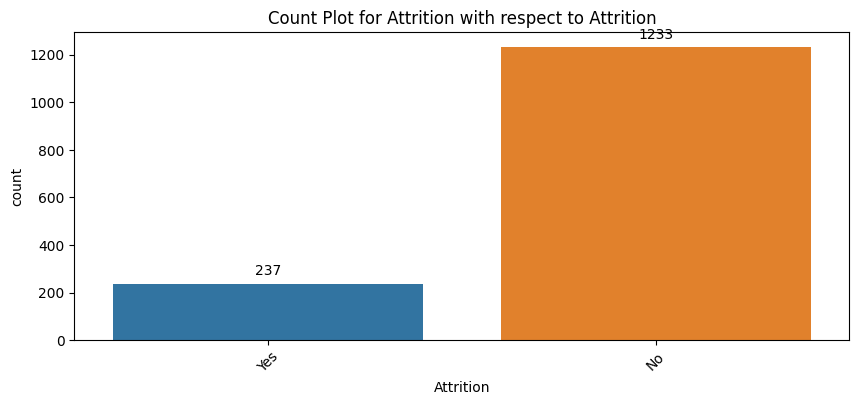

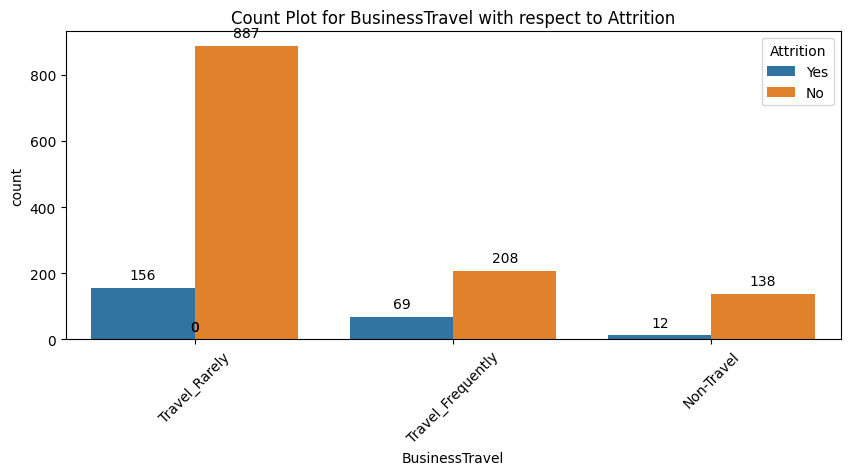

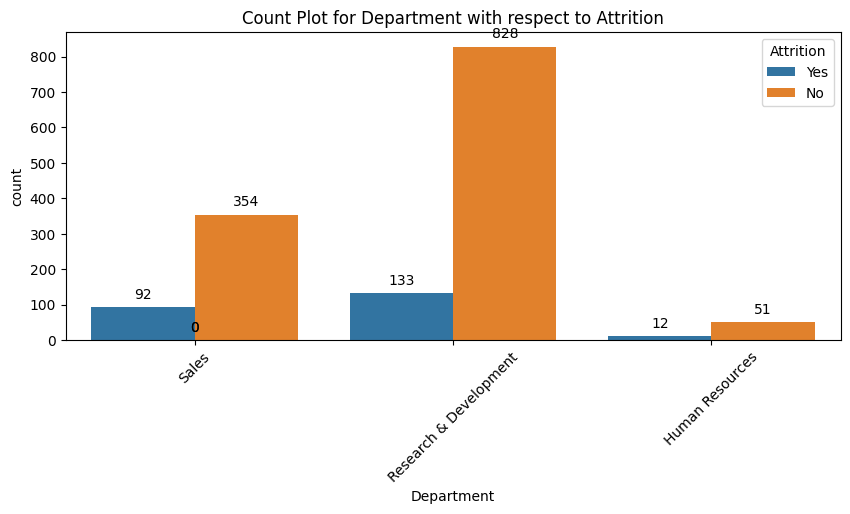

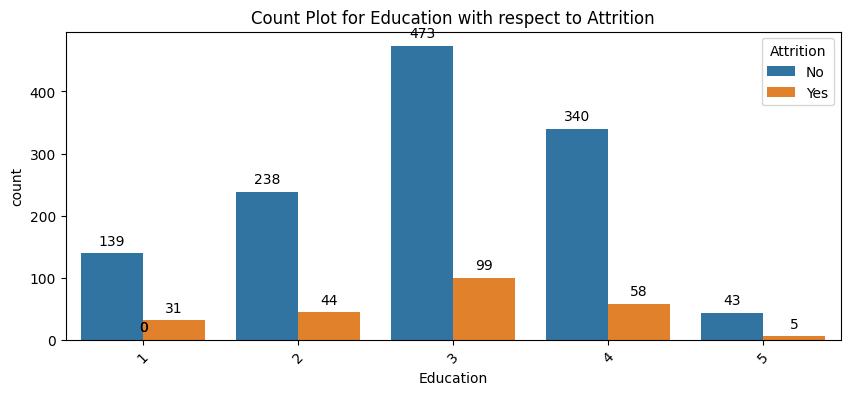

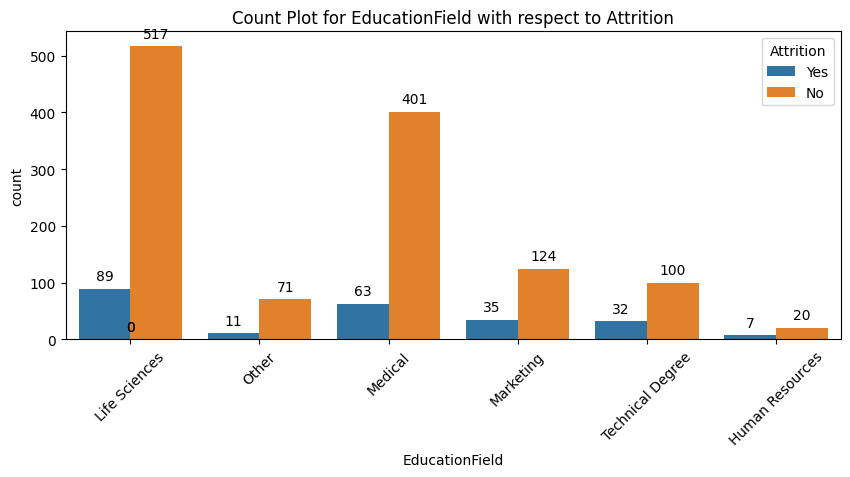

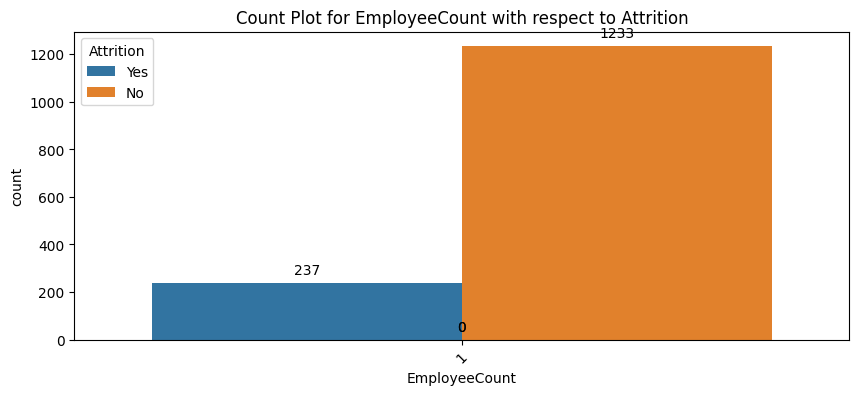

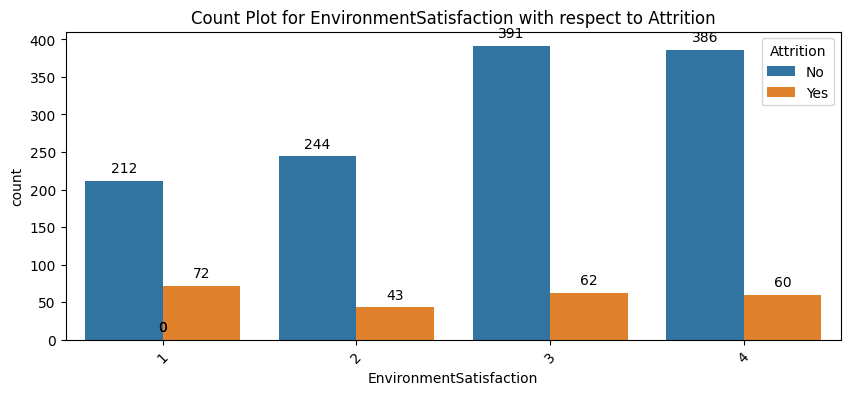

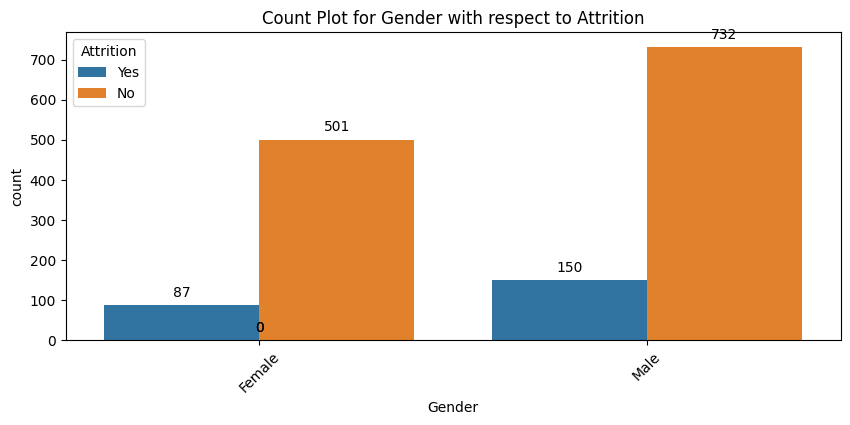

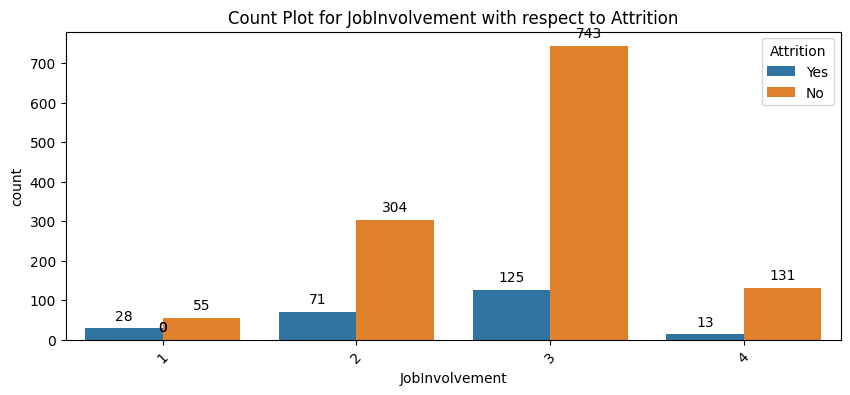

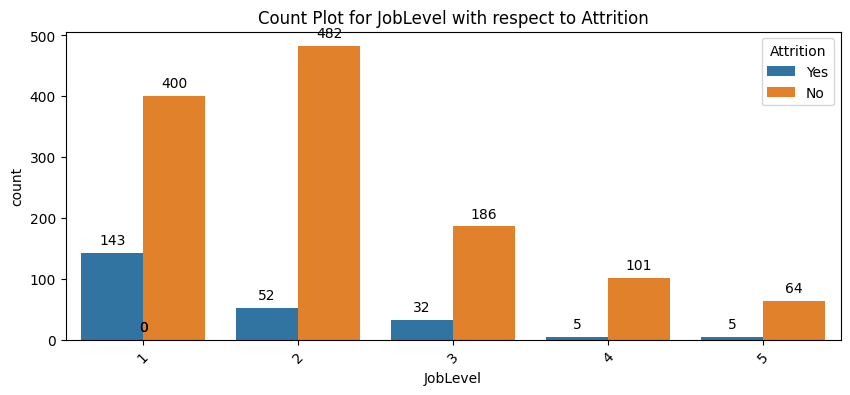

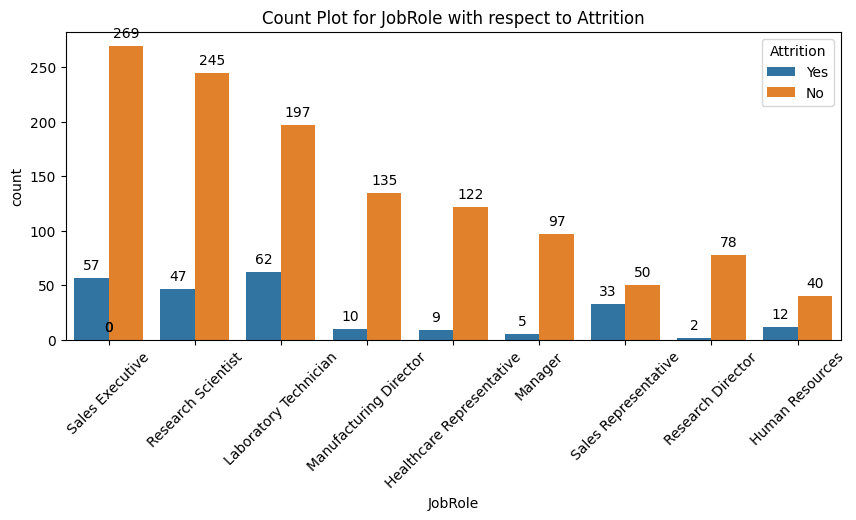

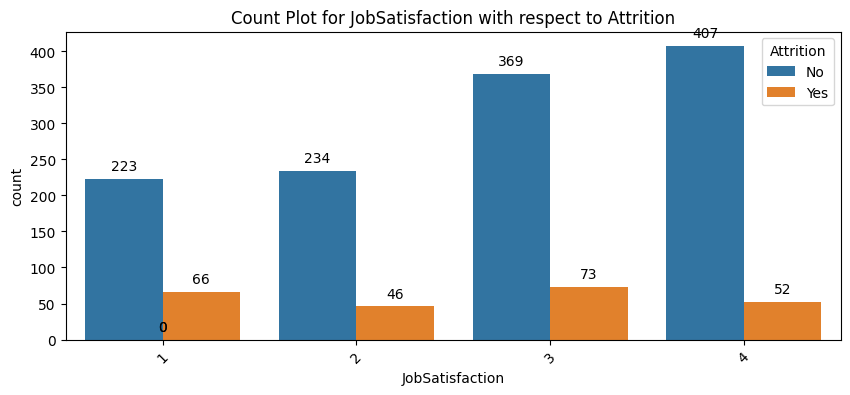

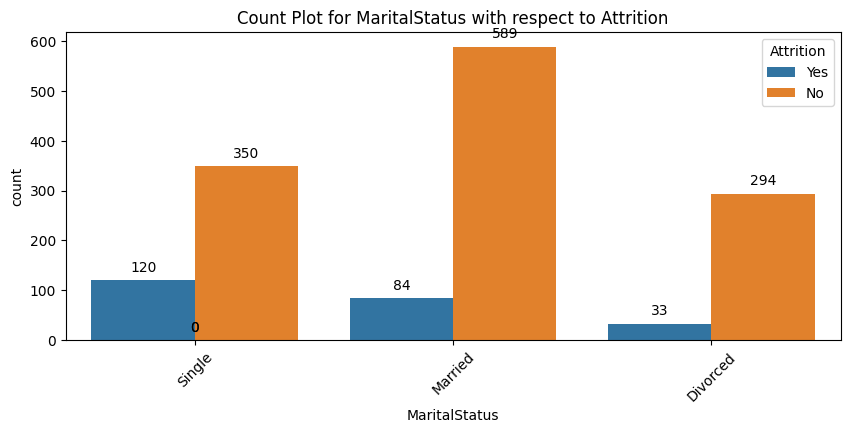

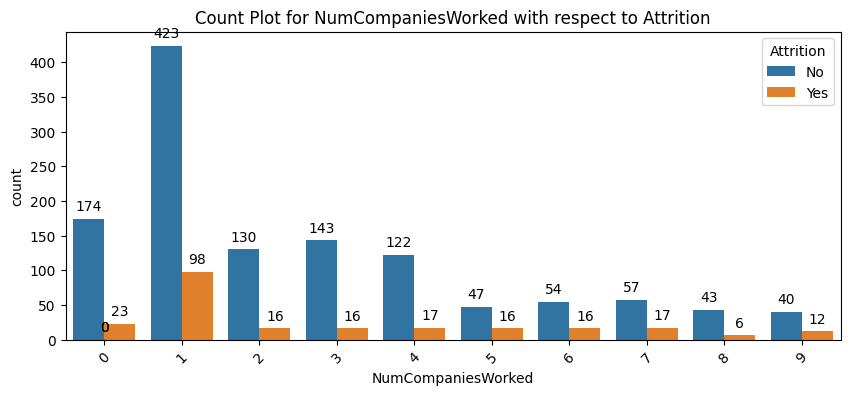

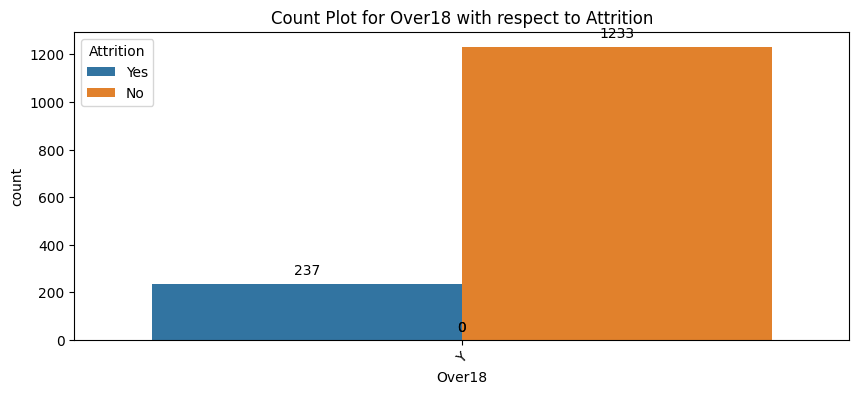

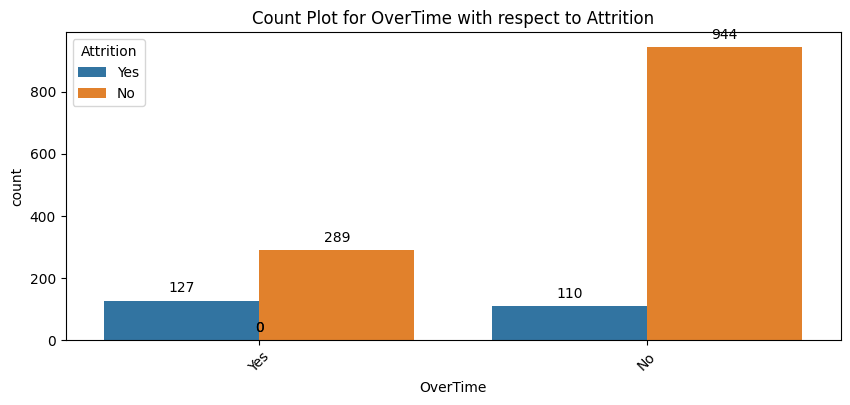

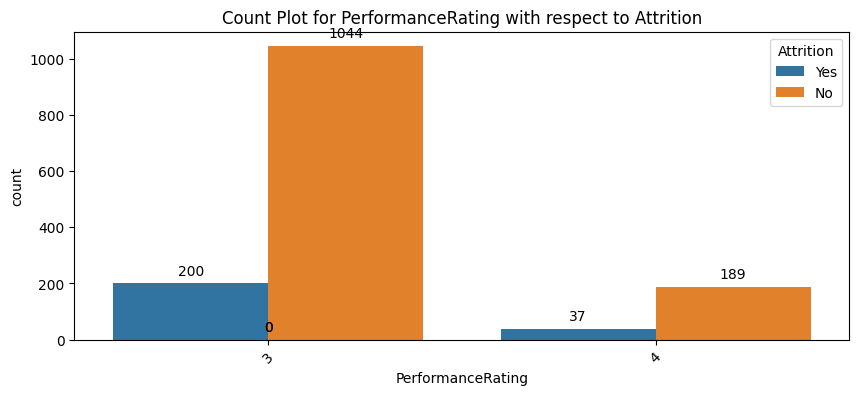

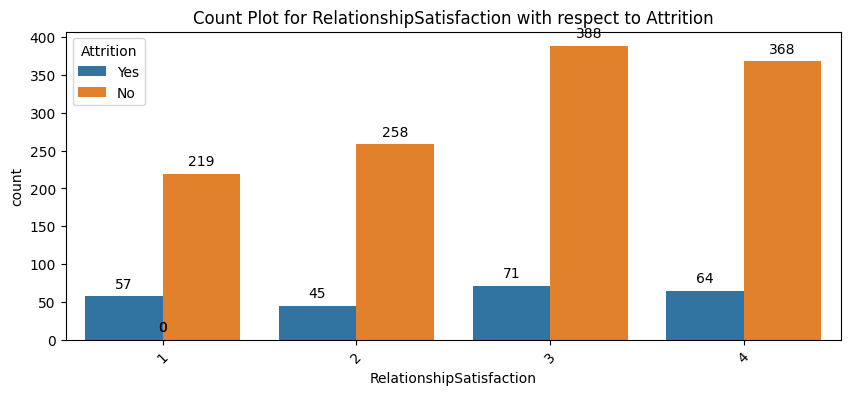

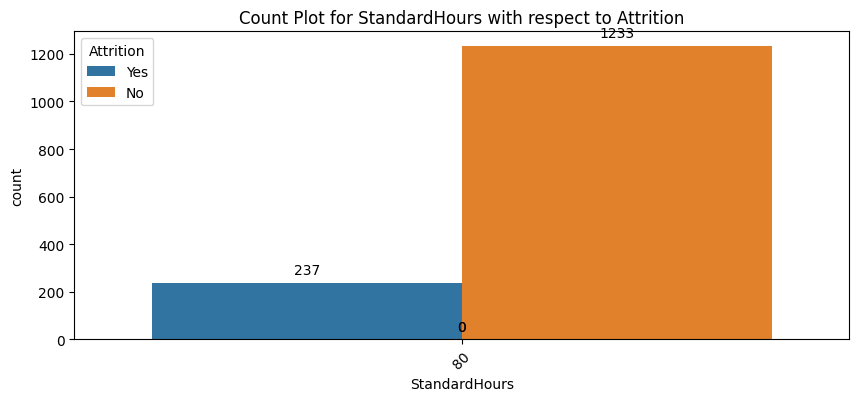

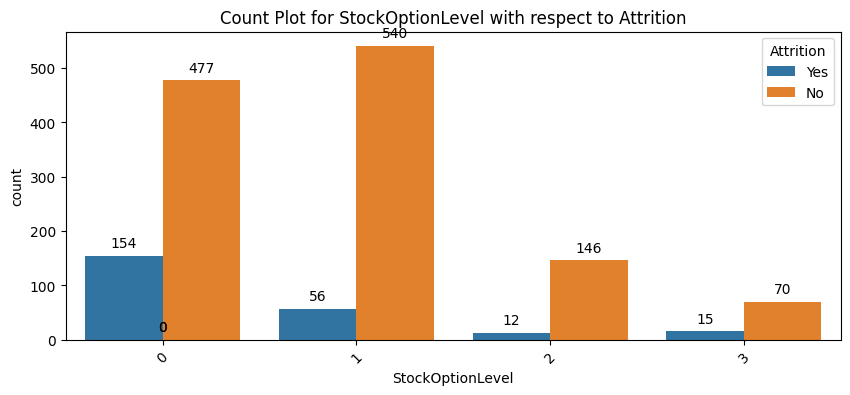

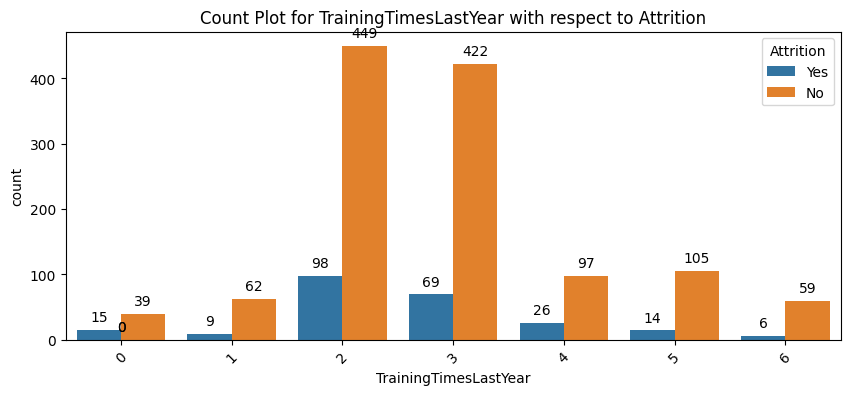

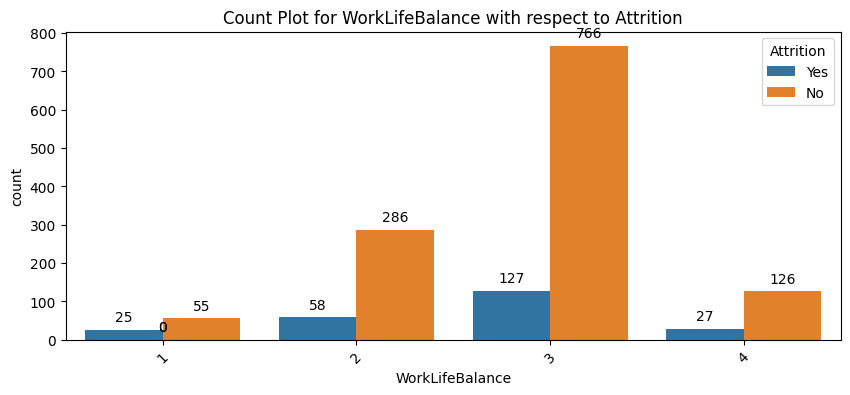

In [13]:

target = 'Attrition'
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=col, hue=target, data=df)
    plt.title(f'Count Plot for {col} with respect to {target}')
    plt.xticks(rotation=45)

    # Annotate each bar with its count
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.show()


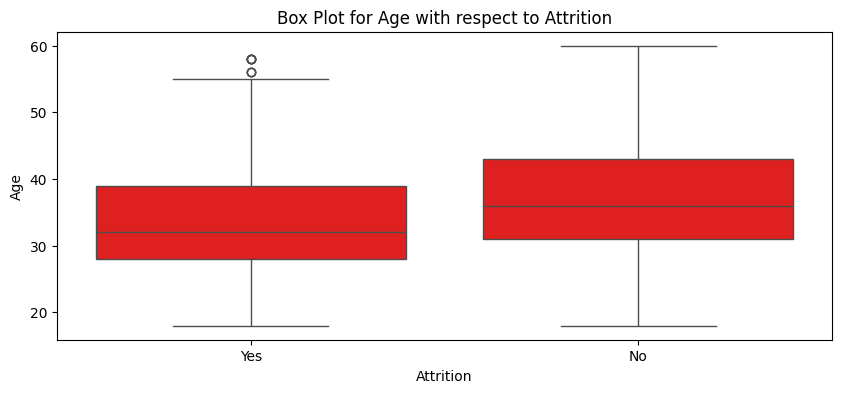

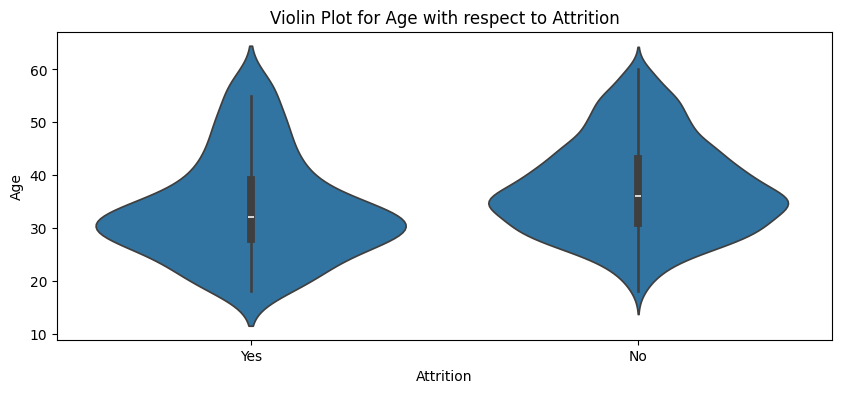

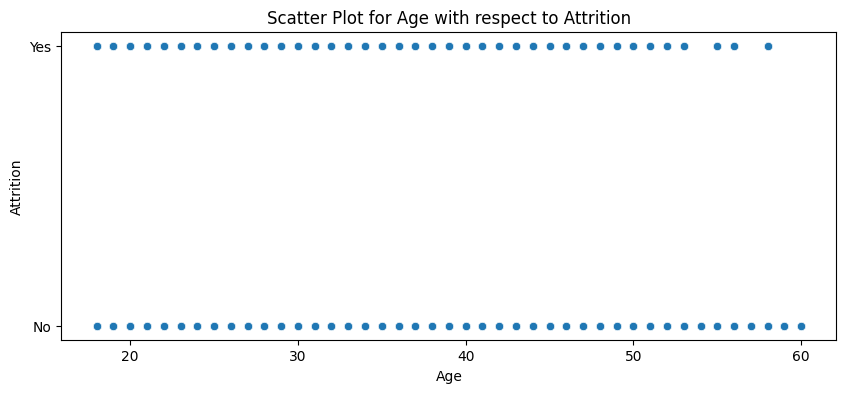

<Figure size 1000x400 with 0 Axes>

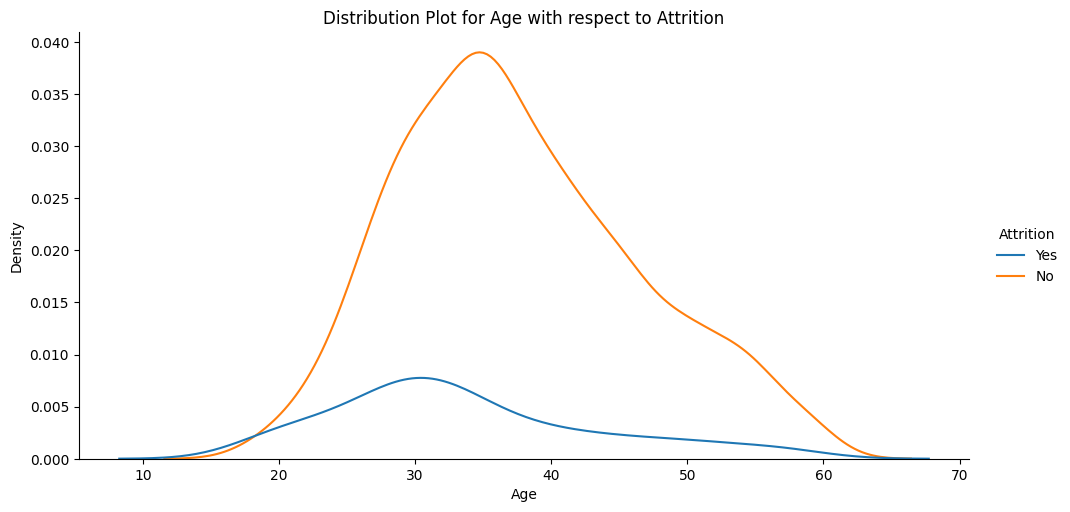

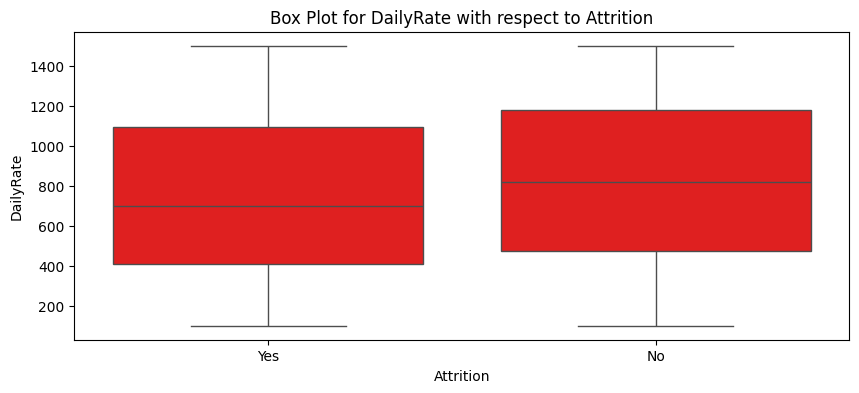

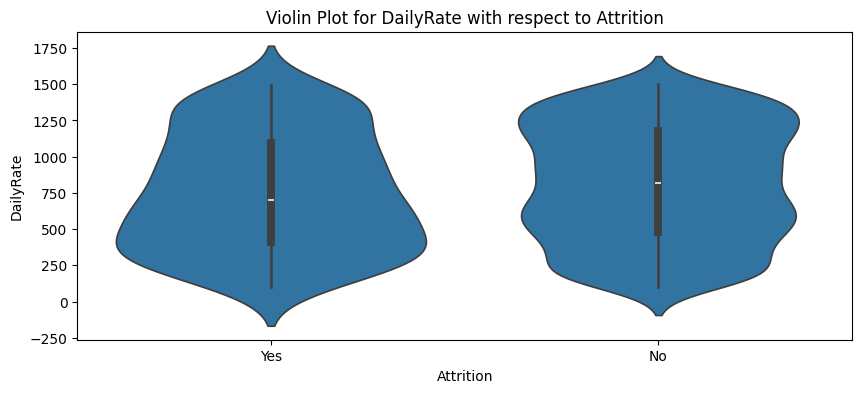

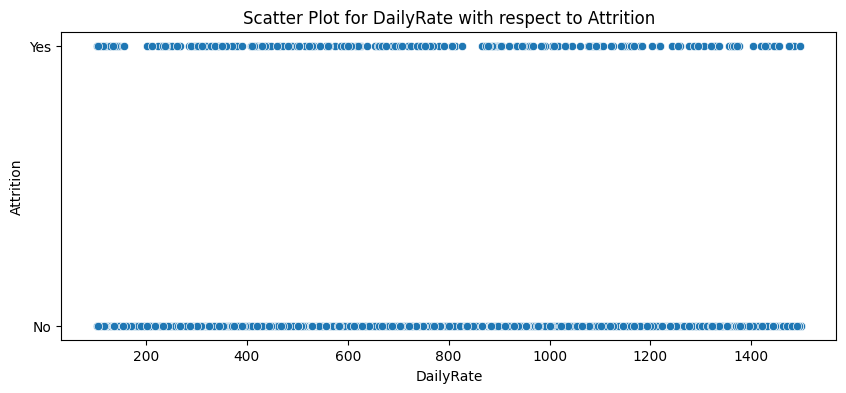

<Figure size 1000x400 with 0 Axes>

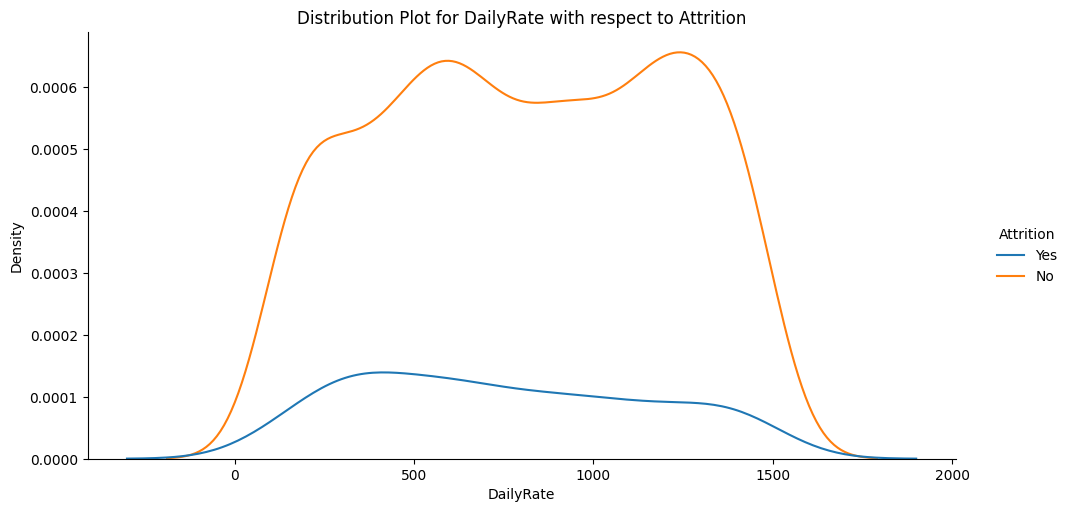

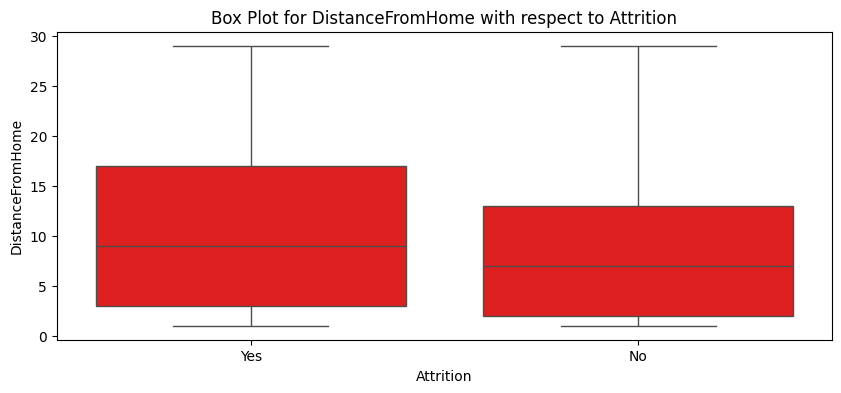

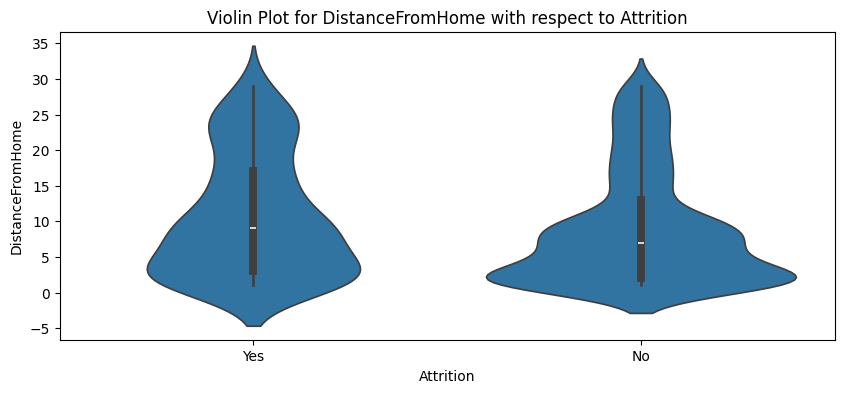

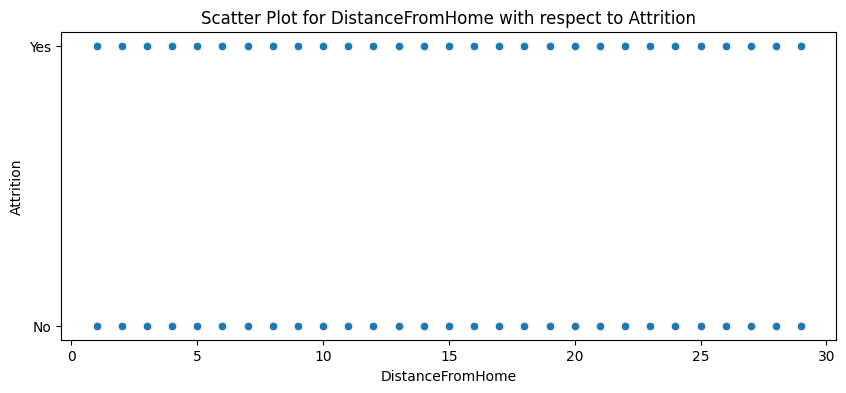

<Figure size 1000x400 with 0 Axes>

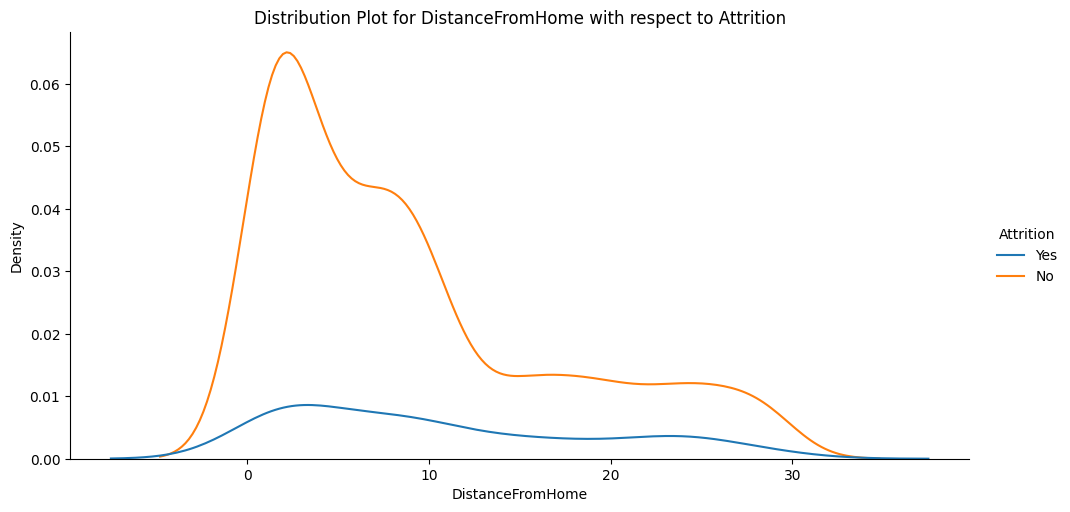

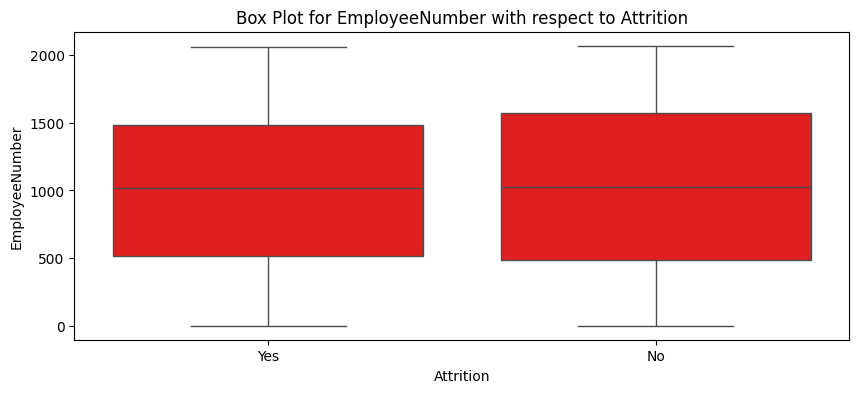

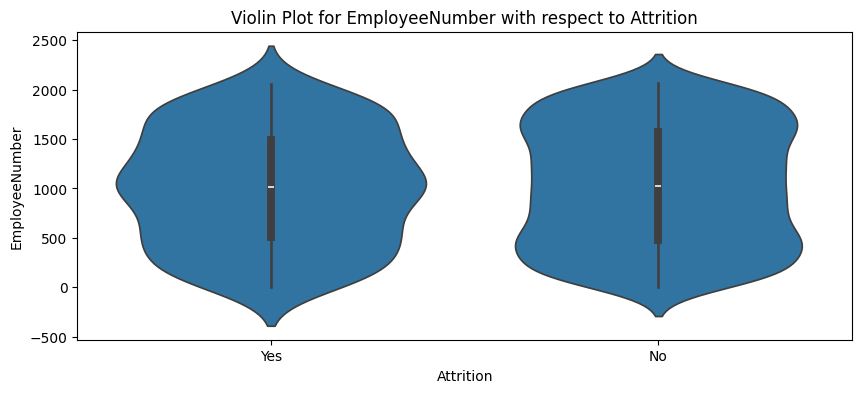

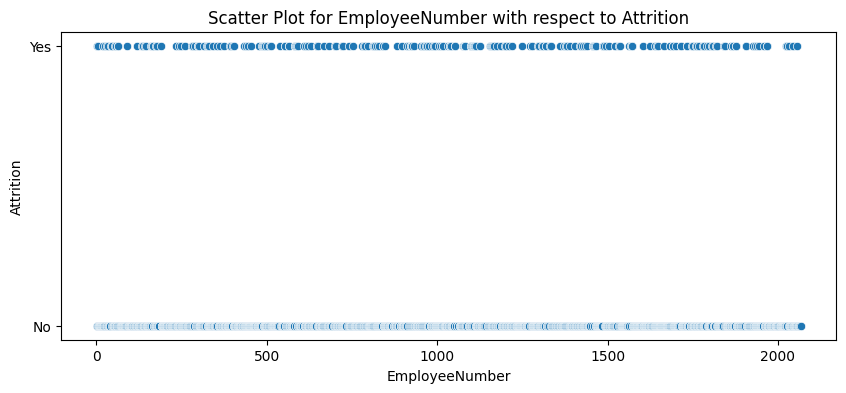

<Figure size 1000x400 with 0 Axes>

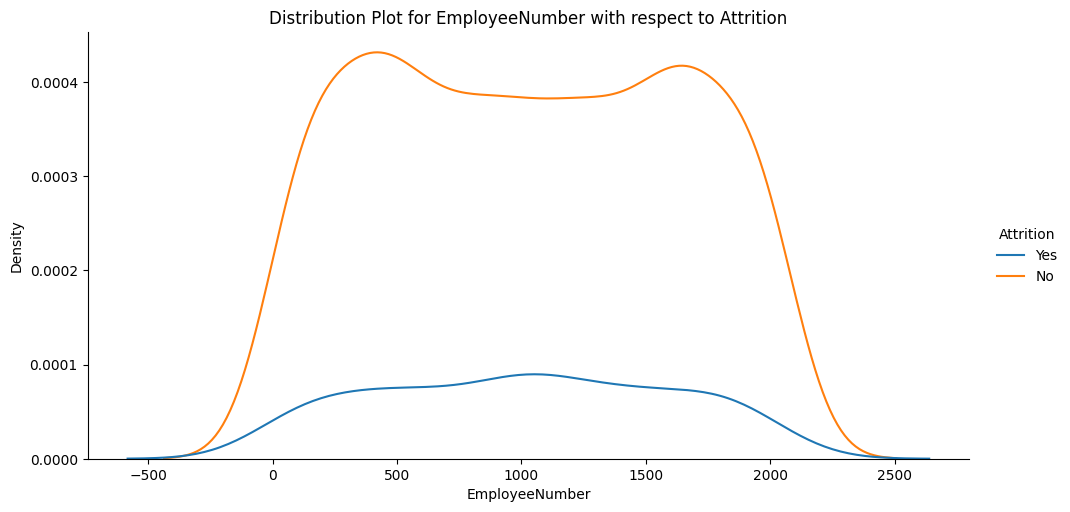

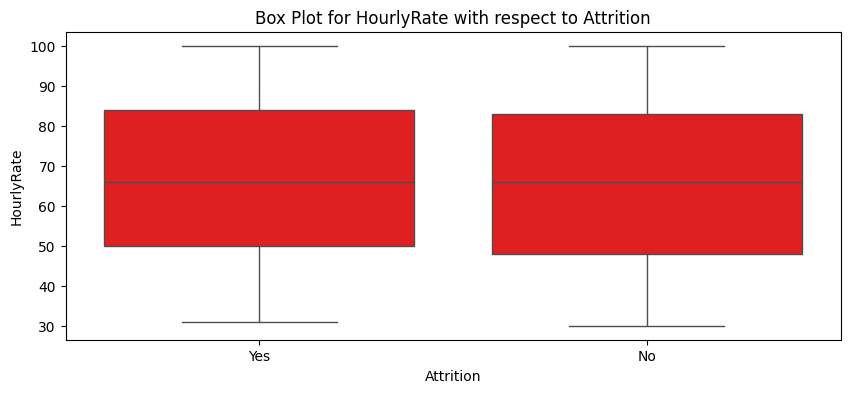

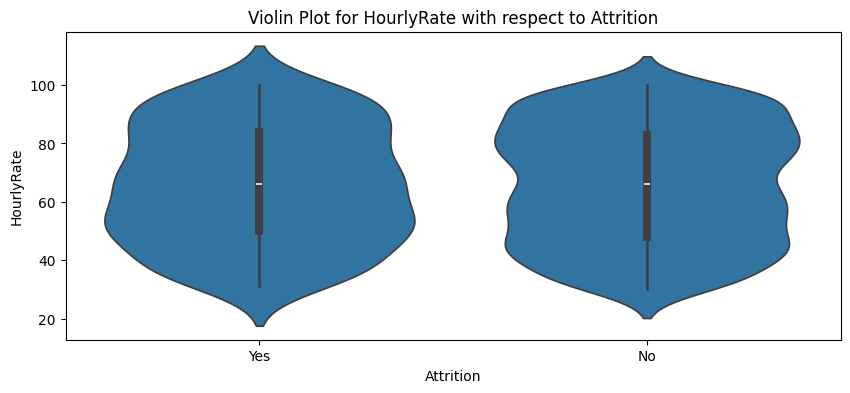

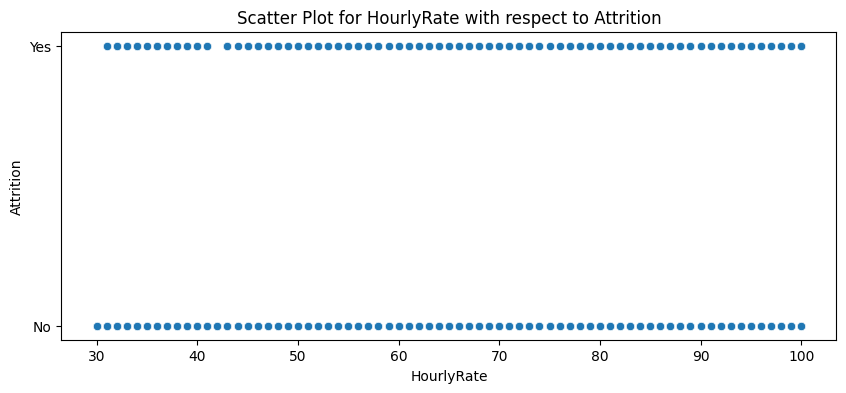

<Figure size 1000x400 with 0 Axes>

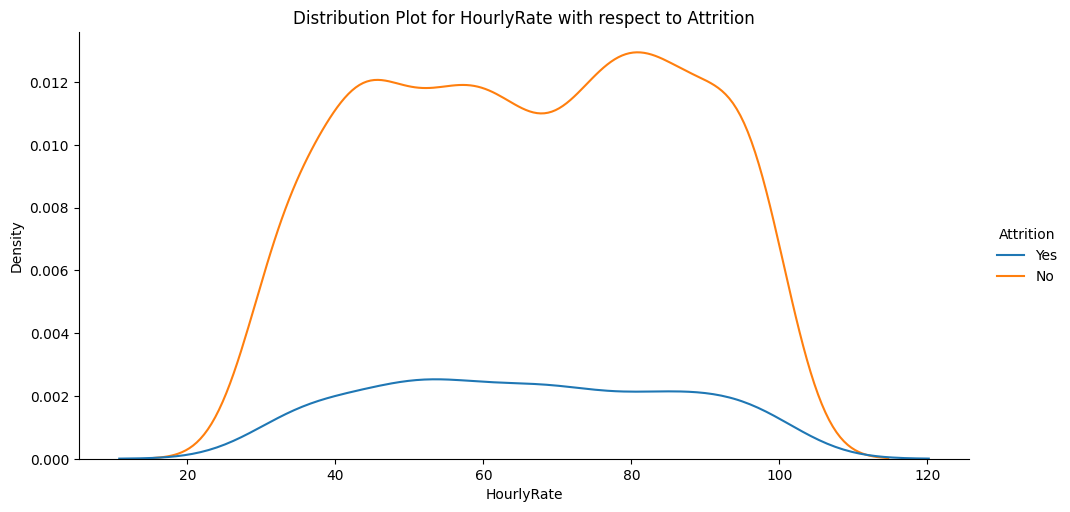

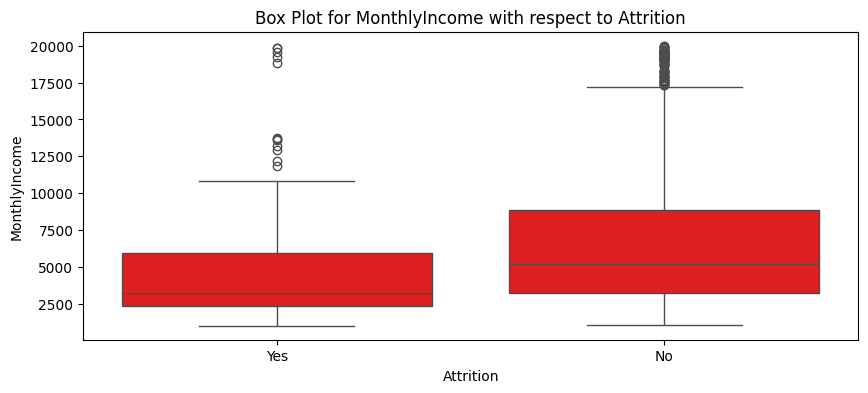

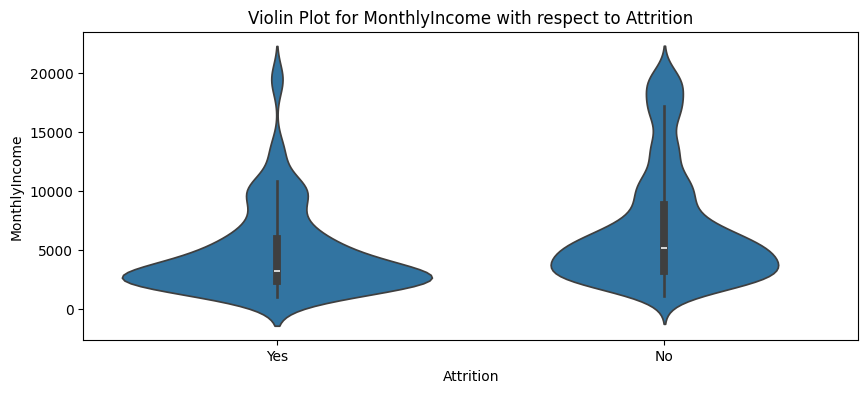

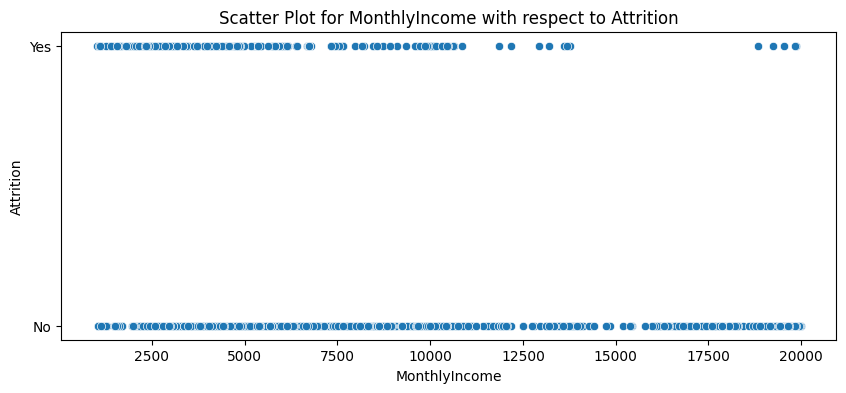

<Figure size 1000x400 with 0 Axes>

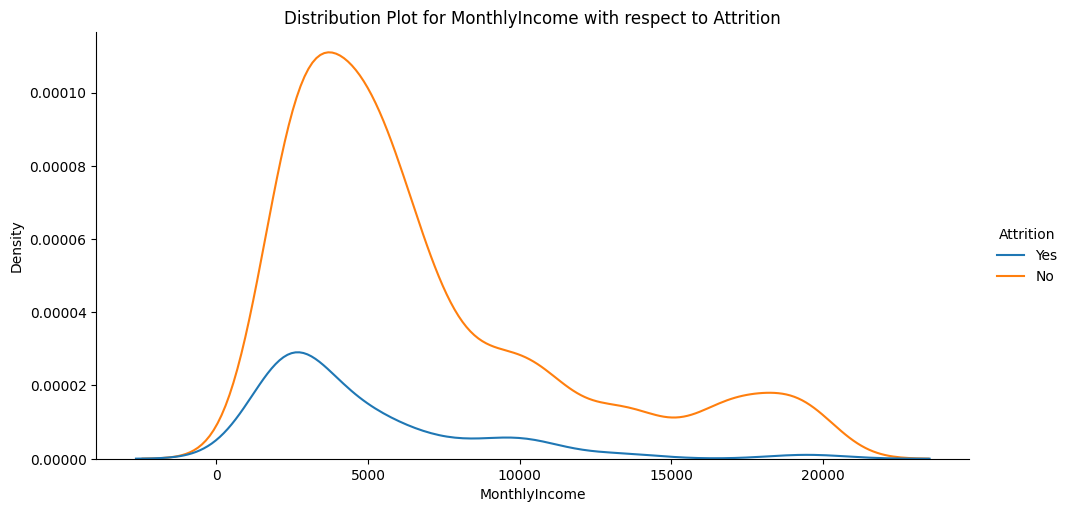

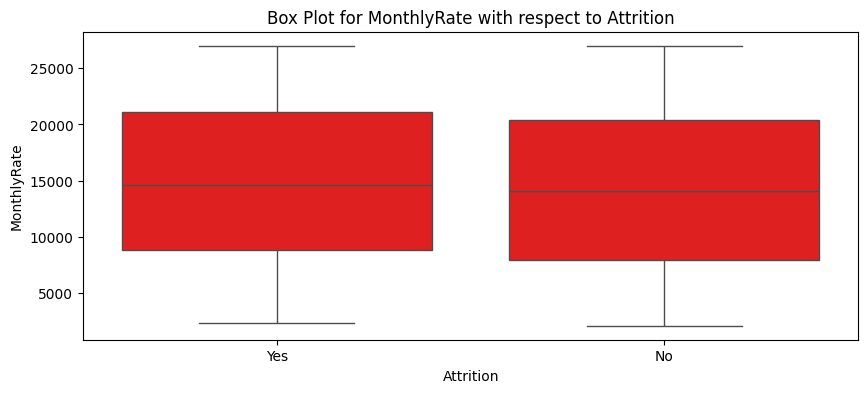

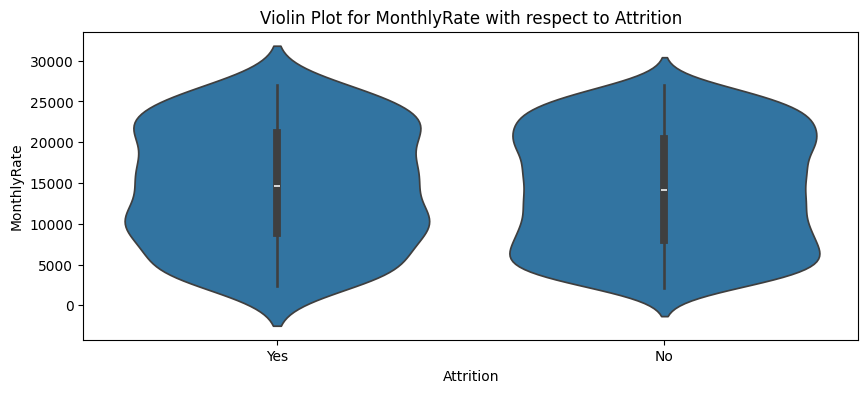

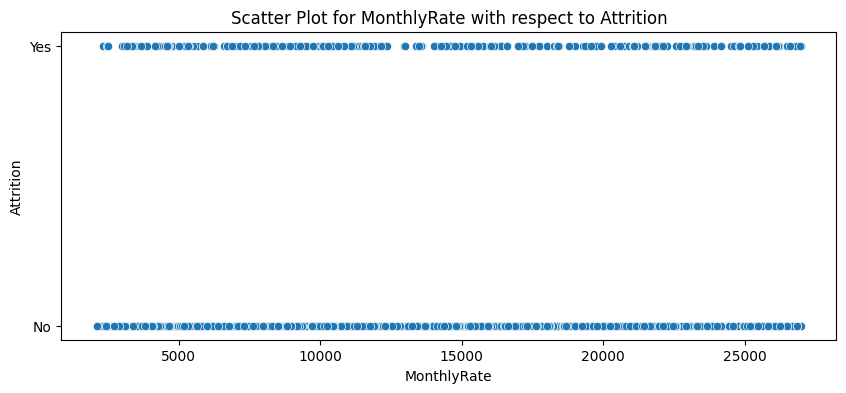

<Figure size 1000x400 with 0 Axes>

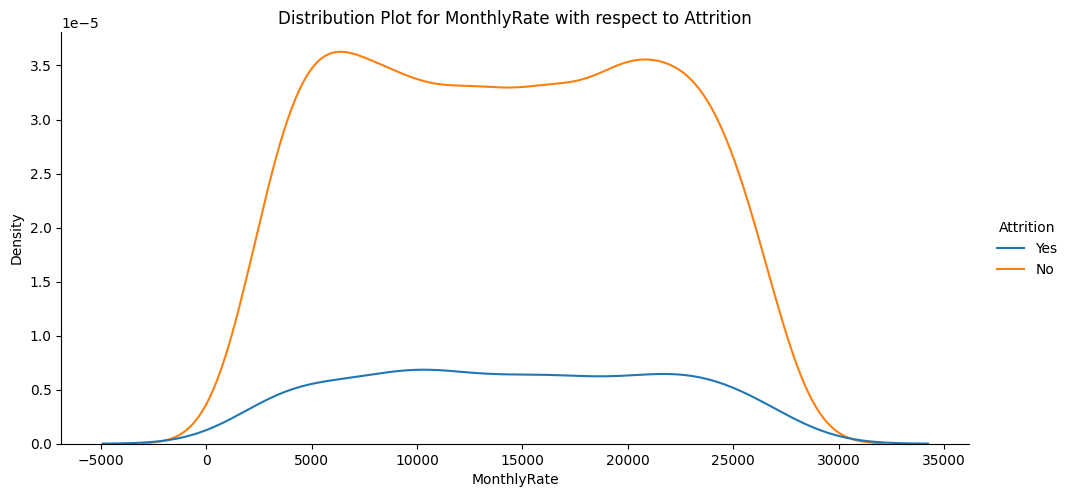

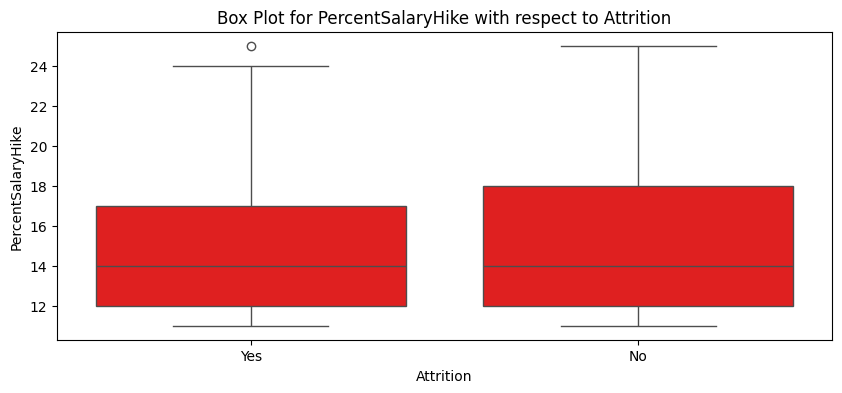

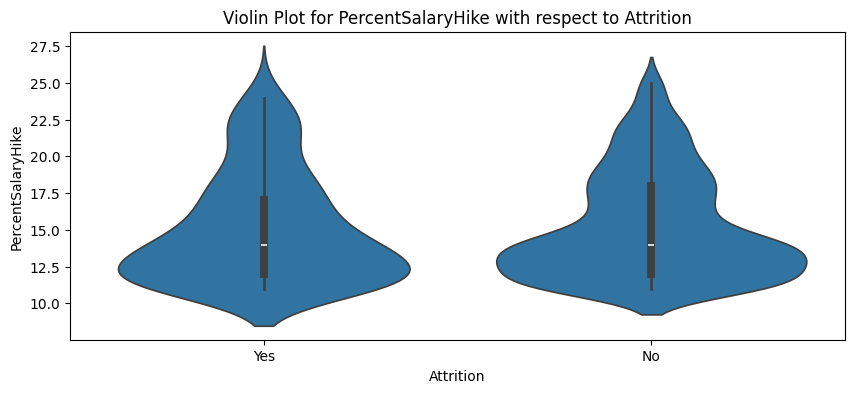

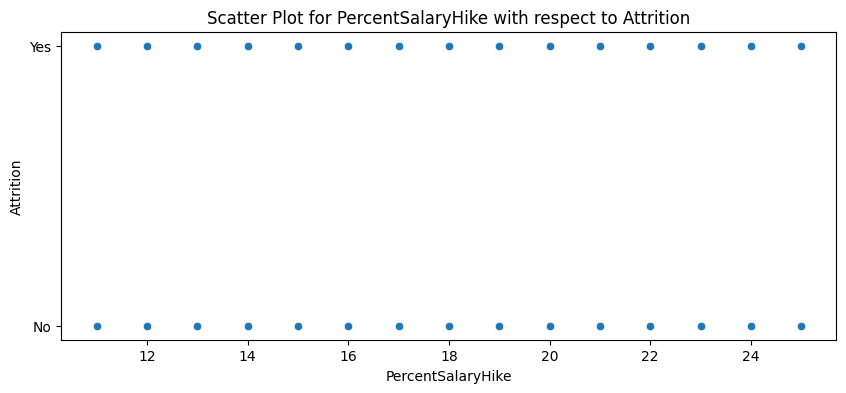

<Figure size 1000x400 with 0 Axes>

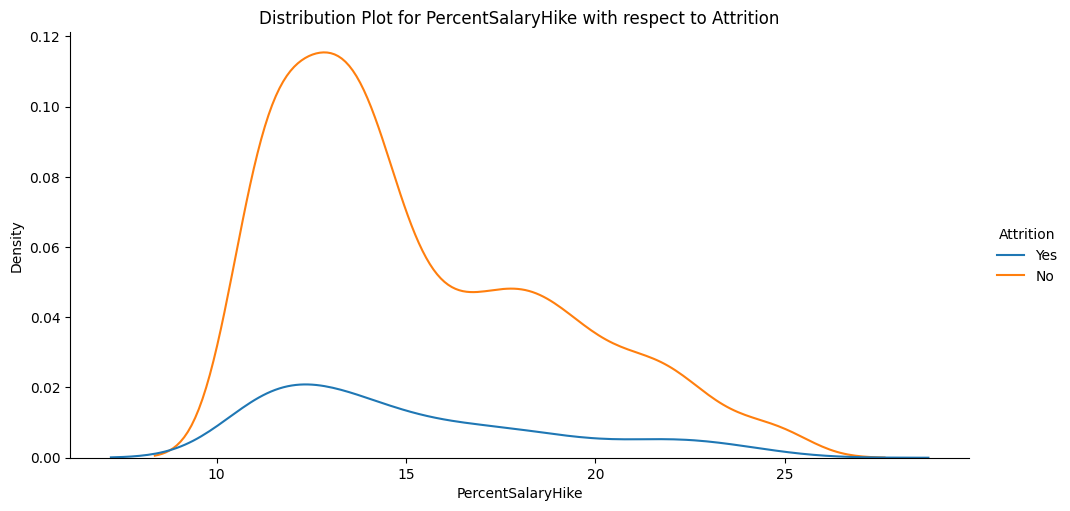

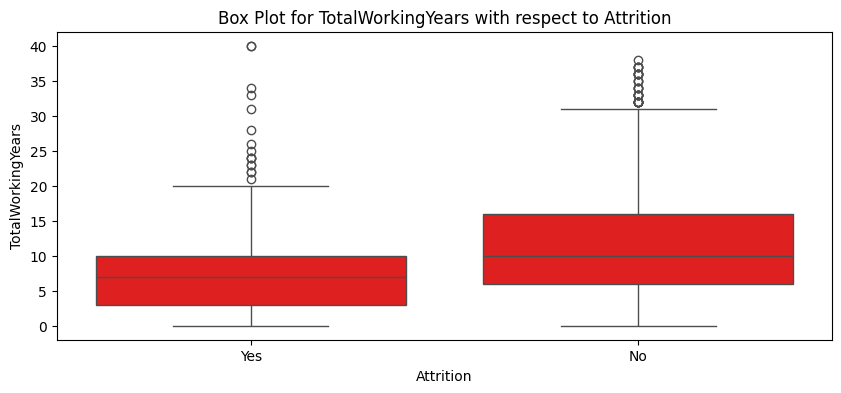

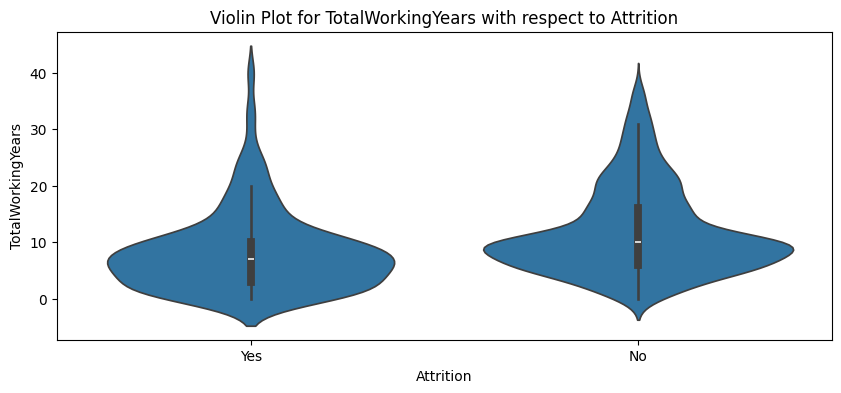

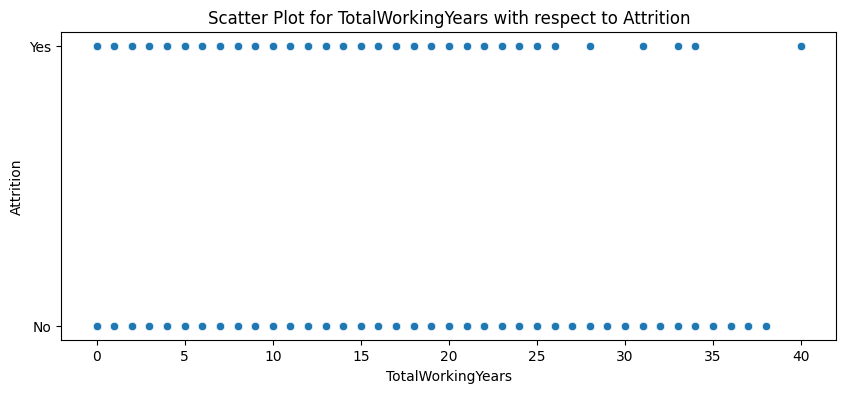

<Figure size 1000x400 with 0 Axes>

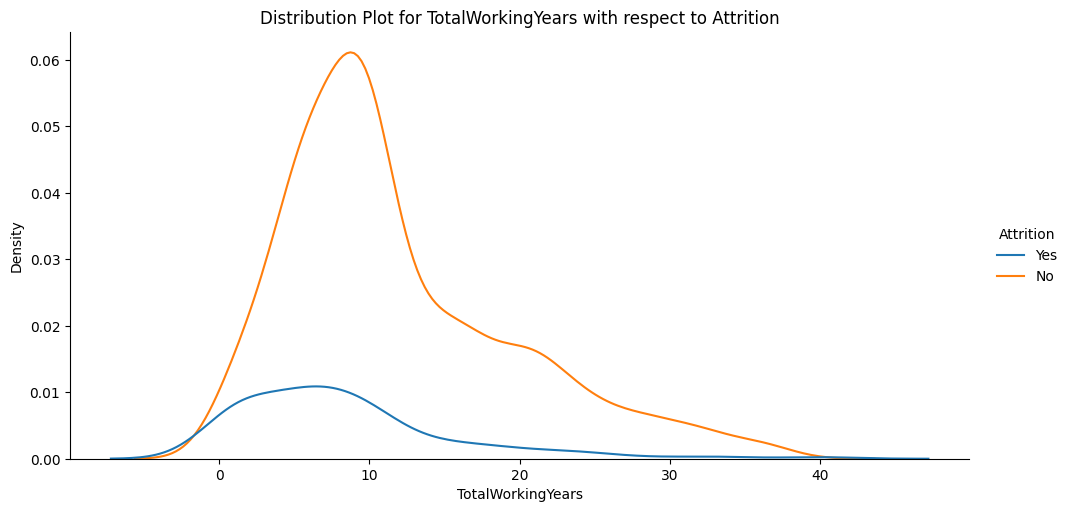

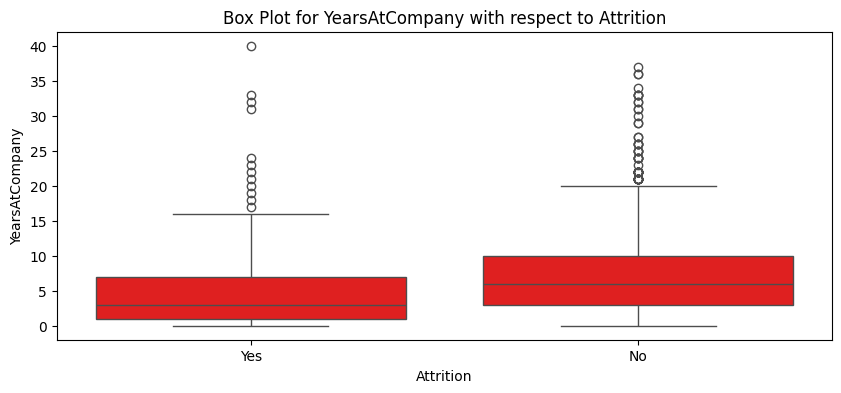

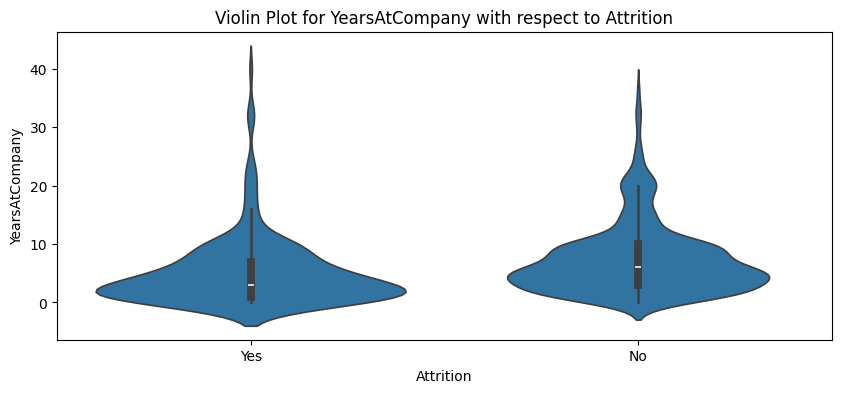

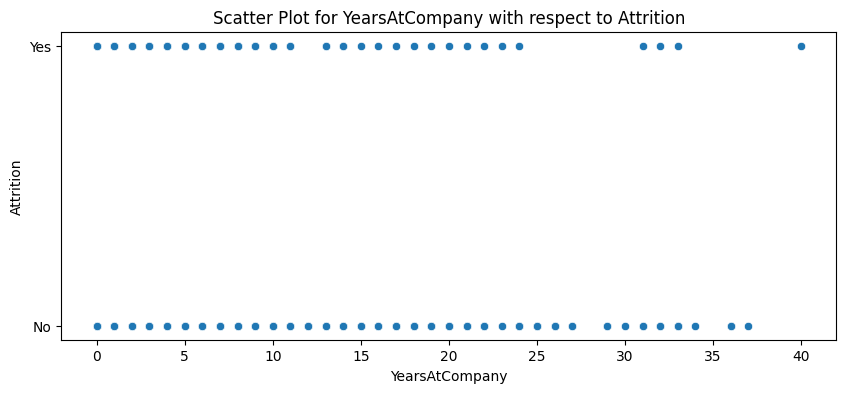

<Figure size 1000x400 with 0 Axes>

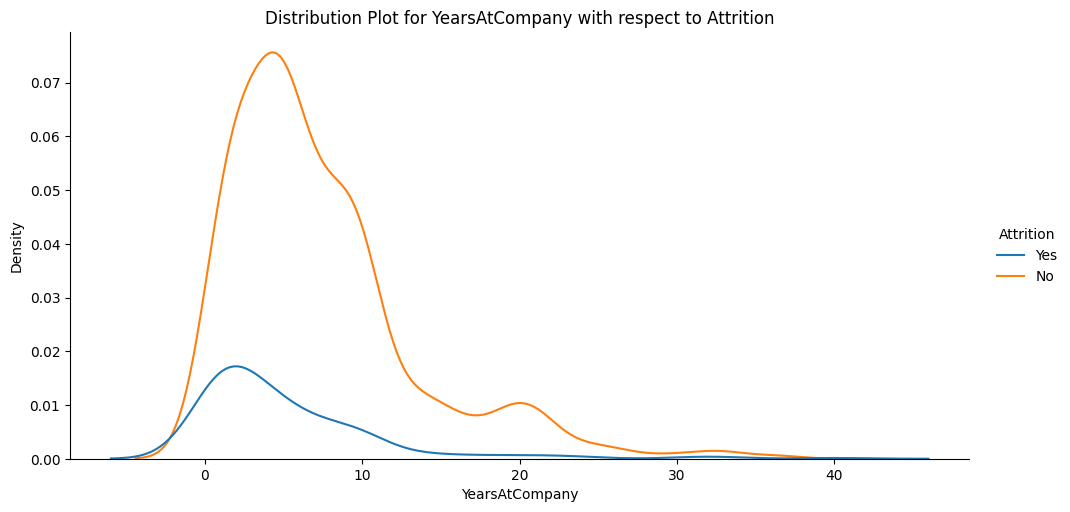

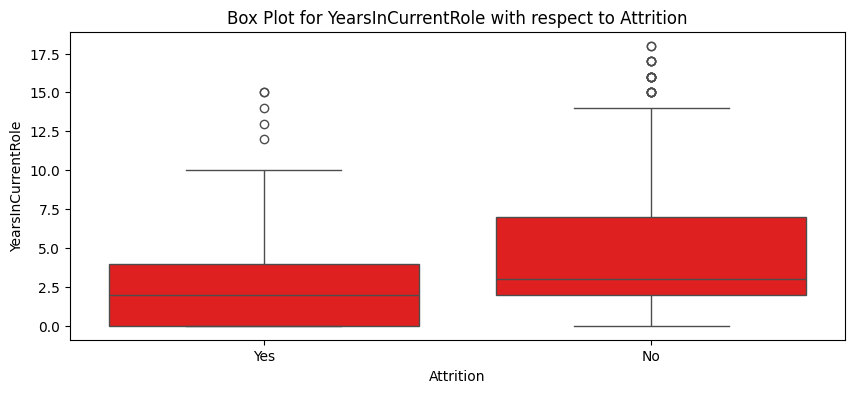

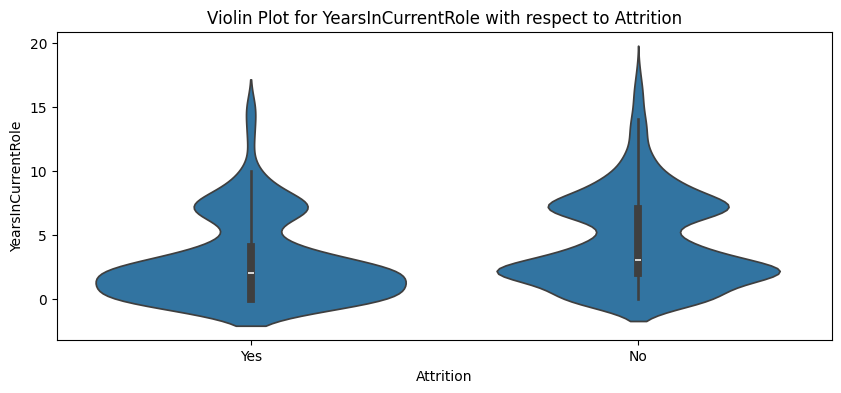

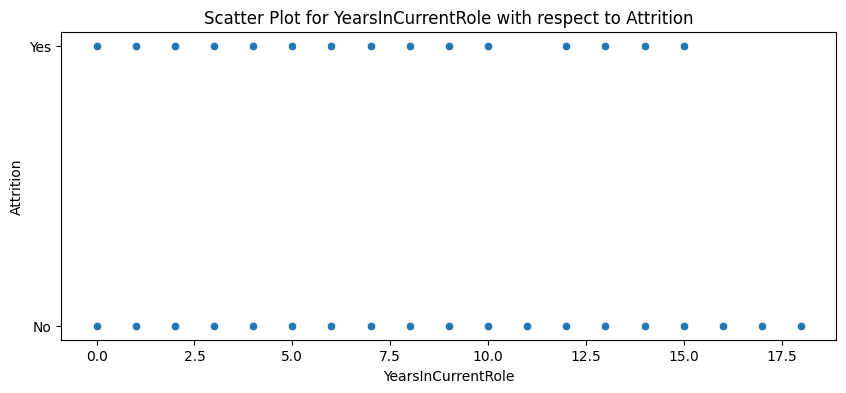

<Figure size 1000x400 with 0 Axes>

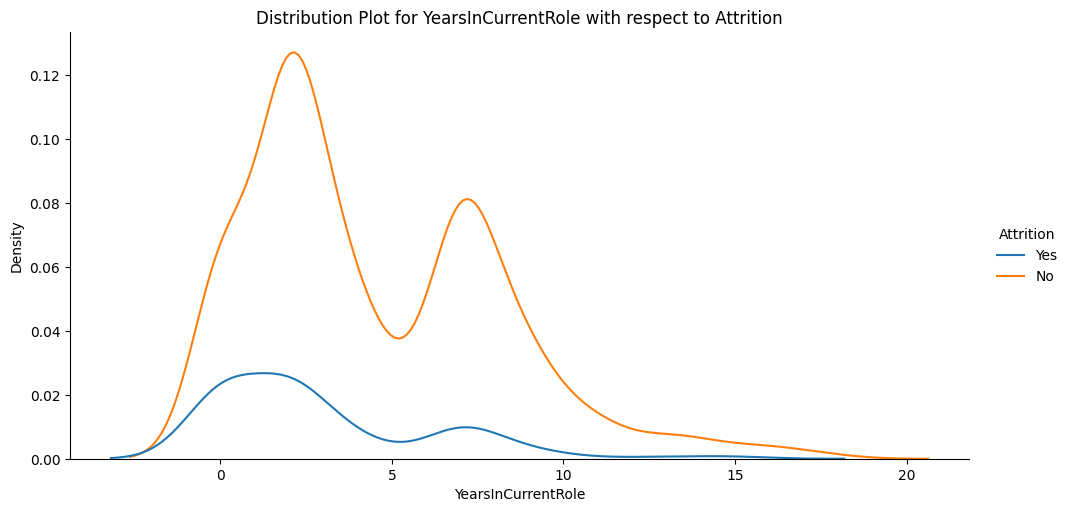

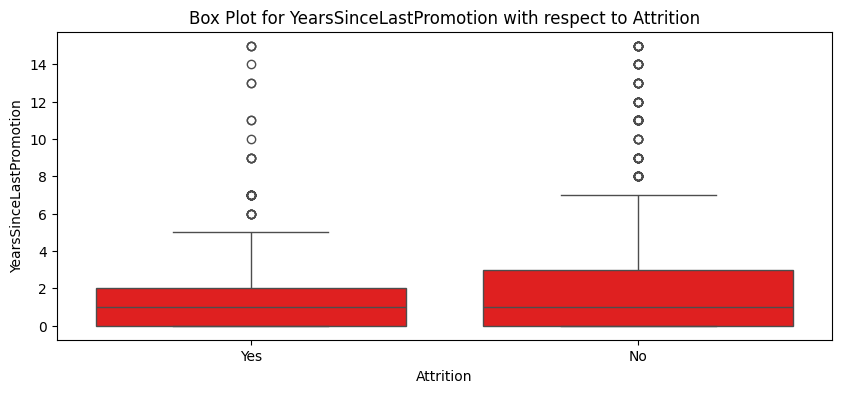

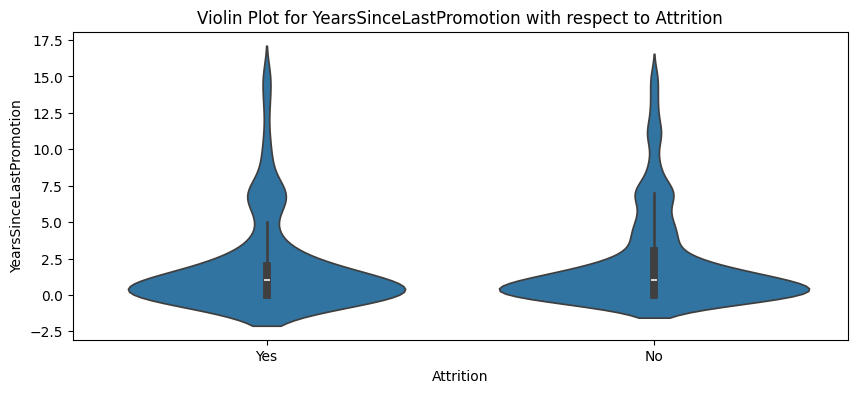

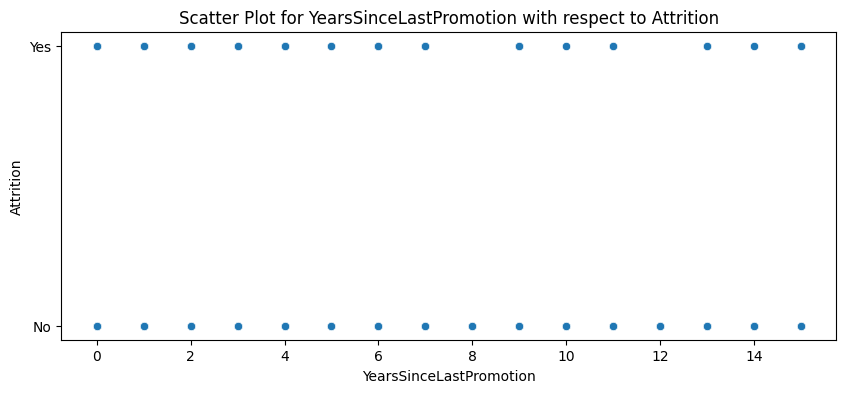

<Figure size 1000x400 with 0 Axes>

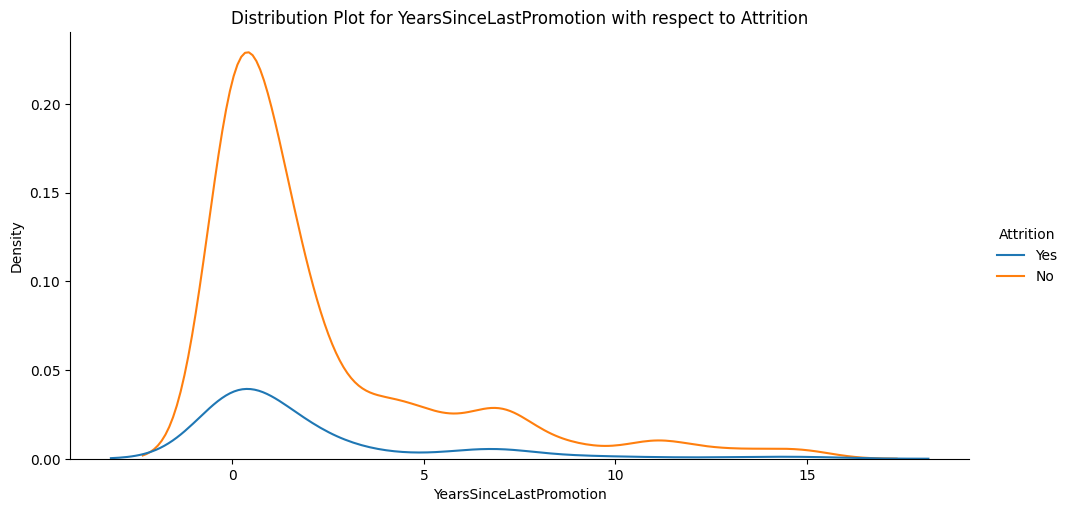

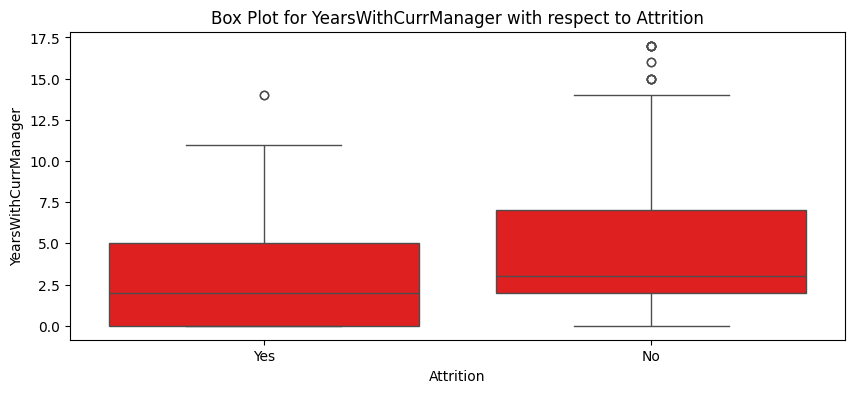

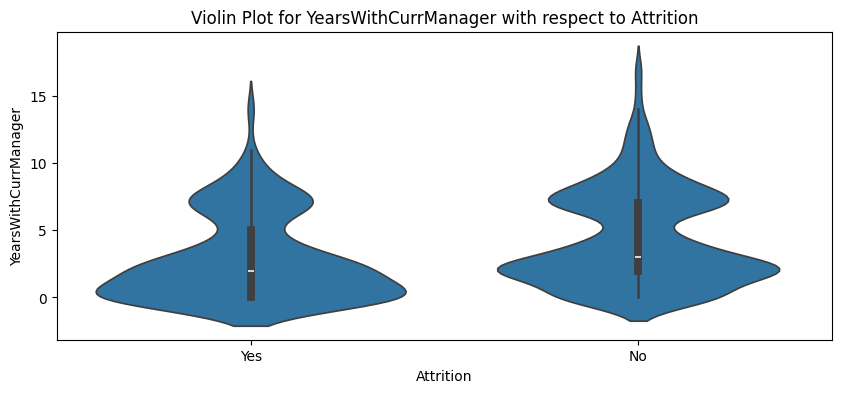

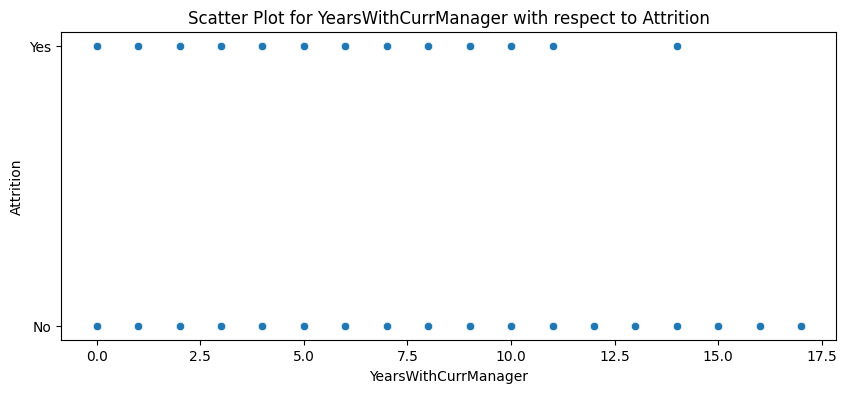

<Figure size 1000x400 with 0 Axes>

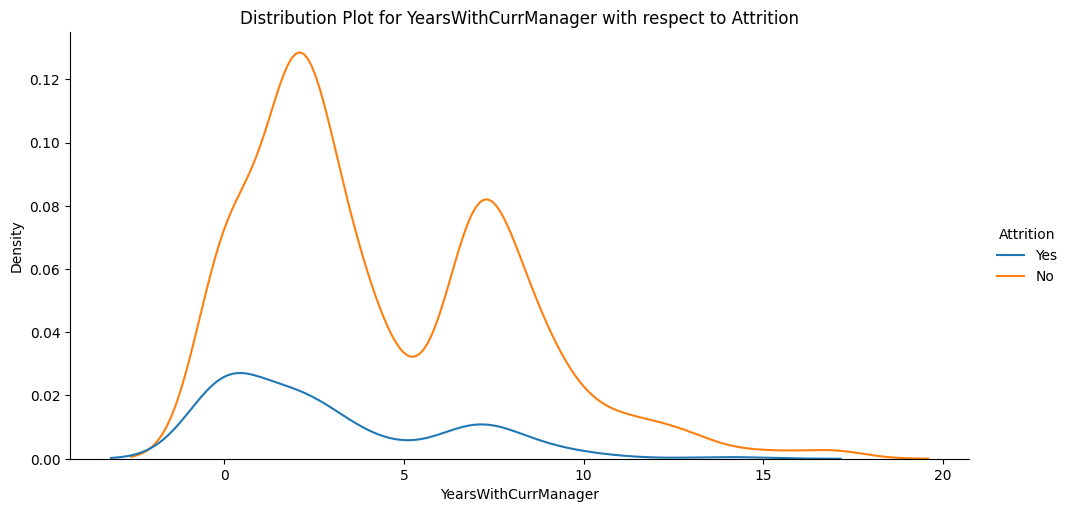

In [14]:
# Bivariate Analysis for Numerical Features
for col in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=target, y=col, data=df,color="red")
    plt.title(f'Box Plot for {col} with respect to {target}')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.violinplot(x=target, y=col, data=df)
    plt.title(f'Violin Plot for {col} with respect to {target}')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=col, y=target, data=df)
    plt.title(f'Scatter Plot for {col} with respect to {target}')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.displot(df, x=col, hue=target, kind="kde", aspect=2)
    plt.title(f'Distribution Plot for {col} with respect to {target}')
    plt.show()

# Multivariate Analysis

- Both dimensionality reduction and feature importance techniques are part of multivariate analysis as they deal with multiple variables
- simultaneously to understand their relationships, reduce complexity, and identify key features.

- **Dimensionality Reduction**: Reduce the number of features while preserving as much information as possible, improving computational efficiency and reducing noise.

- **Feature Importance**: Evaluate which features contribute most to the predictive power of the model, aiding in feature selection and interpretation.

## Presteps do MVA

   - **Outlier Treatment**: Address outliers in the data to prevent them from disproportionately affecting subsequent analyses.

   - **One-Hot Encoding**: Convert categorical variables into numerical format if necessary for the specific dimensionality reduction or feature importance technique.

- **Target Variable Balancing**: Address class imbalance issues if present, typically performed before modeling to ensure each class is adequately represented.


### Outlier Treatment

In [15]:
# List of numerical columns (excluding categorical after one-hot encoding)

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()


# Define function for outlier treatment using IQR
def treat_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q1 -q3
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df[col] = df[col].clip(lower = lower_bound , upper = upper_bound)

# Apply outlier treatment using IQR for each numerical column
for col in numerical_cols:
    treat_outliers(df,col)

### One Hot Encoding

In [16]:
# Apply one-hot encoding using pd.get_dummies
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

# Removig Target variable from print categorical_columns
categorical_cols.remove('Attrition')
print(categorical_cols)
df = pd.get_dummies(df,columns=categorical_cols, drop_first=True)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


### Target Variable Balancing

In [17]:

X = df.drop("Attrition",axis=1)
print(X.shape)
y = df["Attrition"]
print(y.shape)
smote = SMOTE()
X_balanced,y_balanced = smote.fit_resample(X, y)
print(X_balanced.shape)
print(y_balanced.shape)

(1470, 47)
(1470,)
(2466, 47)
(2466,)


## Dimensionality Reduction

#### Variance Explained Criterion

- The most common method is to choose 𝑛 ,n such that the selected components explain a sufficiently large proportion of the total variance.

- This is often done by plotting the cumulative explained variance and selecting the number of components that capture a desired threshold (e.g., 90%, 95%).

  - Fit PCA to the data.
  - Calculate the cumulative explained variance.
  - Choose the smallest number of components that explain the desired amount of variance.

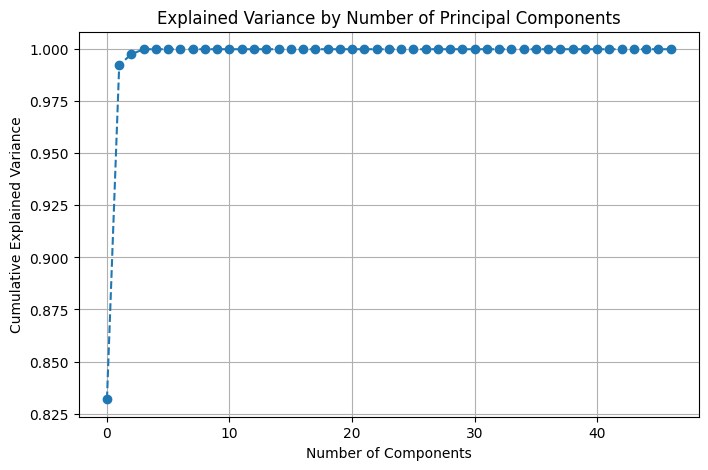

Number of components chosen: 2


In [18]:
# Apply dimensionality reduction techniques on the balanced feature matrix X_balanced

pca = PCA().fit(X_balanced)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Choose number of components where cumulative explained variance is just over 90%

n_components = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f'Number of components chosen: {n_components}')

#### Scree Plot

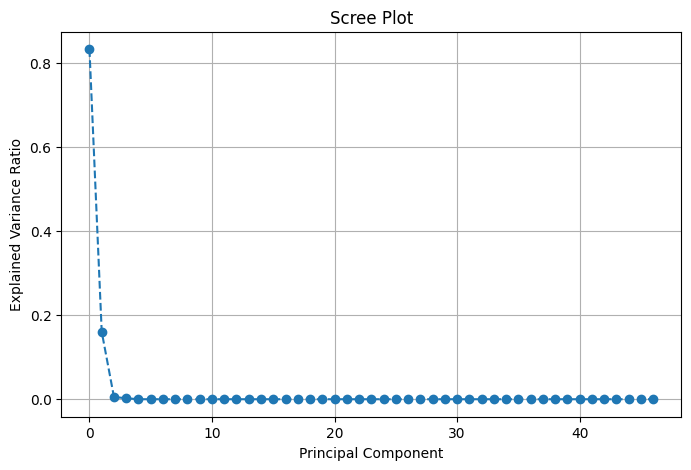

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [20]:
# Fit PCA with 2 components based on the previous analysis and Transform Data

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_balanced)

print(f"Original shape: {X_balanced}")
print(f"Reduced shape: {X_reduced.shape}")



Original shape:             Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0     41.000000       1102                 1          2              1   
1     49.000000        279                 8          1              1   
2     37.000000       1373                 2          2              1   
3     33.000000       1392                 3          4              1   
4     27.000000        591                 2          1              1   
...         ...        ...               ...        ...            ...   
2461  26.535278       1377                15          3              1   
2462  25.929664        623                11          3              1   
2463  29.708482        267                20          3              1   
2464  47.602942        263                16          2              1   
2465  27.387453        377                 7          1              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                 

#### PCA with 2 components and Transform Data

In [21]:
# Get the loadings (components)

loadings = pca.components_.T  # Transpose to get shape (features, components)
print(f'Shape of loadings: {loadings.shape}')  # Should be (47, 2)

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, index=X_balanced.columns, columns=['PC1', 'PC2'])
print(loadings_df)

Shape of loadings: (47, 2)
                                            PC1           PC2
Age                                2.004046e-05  1.312997e-03
DailyRate                          5.171968e-03  4.118673e-03
DistanceFromHome                  -2.105160e-05  5.639531e-05
Education                          1.890092e-06  5.622209e-05
EmployeeCount                     -8.391175e-37 -6.523453e-37
EmployeeNumber                     3.078736e-04  9.928053e-04
EnvironmentSatisfaction           -3.931812e-06  6.023883e-06
HourlyRate                         7.736756e-05 -2.600739e-05
JobInvolvement                     2.065686e-06  2.826515e-06
JobLevel                          -7.405170e-06  2.762501e-04
JobSatisfaction                   -8.741559e-06  2.401357e-05
MonthlyIncome                     -2.186474e-02  9.997502e-01
MonthlyRate                       -9.997475e-01 -2.184311e-02
NumCompaniesWorked                -5.067352e-06  1.057682e-04
PercentSalaryHike                 -7.827300

####  Calculate Feature Contributions and Identify Low-Contributing Features:

In [22]:
# Calculate the absolute values of the loadings to assess contribution
loadings_df['PC1_abs'] = loadings_df['PC1'].abs()
loadings_df['PC2_abs'] = loadings_df['PC2'].abs()

# Calculate the mean contribution across both components
loadings_df['mean_contribution'] = loadings_df[['PC1_abs', 'PC2_abs']].mean(axis=1)


In [23]:
# Sort features by their mean contribution
sorted_features = loadings_df.sort_values(by='mean_contribution', ascending=False)
print(sorted_features)

                                            PC1           PC2       PC1_abs  \
MonthlyIncome                     -2.186474e-02  9.997502e-01  2.186474e-02   
MonthlyRate                       -9.997475e-01 -2.184311e-02  9.997475e-01   
DailyRate                          5.171968e-03  4.118673e-03  5.171968e-03   
TotalWorkingYears                  1.121316e-05  1.323186e-03  1.121316e-05   
Age                                2.004046e-05  1.312997e-03  2.004046e-05   
EmployeeNumber                     3.078736e-04  9.928053e-04  3.078736e-04   
YearsAtCompany                     3.391633e-05  6.350485e-04  3.391633e-05   
YearsInCurrentRole                 2.280679e-05  4.482518e-04  2.280679e-05   
YearsWithCurrManager               3.104608e-05  4.331003e-04  3.104608e-05   
JobLevel                          -7.405170e-06  2.762501e-04  7.405170e-06   
YearsSinceLastPromotion            1.243542e-05  2.004257e-04  1.243542e-05   
NumCompaniesWorked                -5.067352e-06  1.0

- Choose a threshold to determine low-contributing features
- threshold = 0.1  
- This can be adjusted based on domain knowledge

In [24]:
# Identify features to drop
# features_to_drop = sorted_features[sorted_features['mean_contribution'] < threshold].index.tolist()
# print(f'Features to drop: {features_to_drop}')

# Feature Importance

In [25]:
# X_balanced and y_balanced are your balanced feature matrix and target vector

model = RandomForestClassifier(random_state=42)
model.fit(X_balanced, y_balanced)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_balanced.columns)
print(feature_importances.sort_values(ascending=False))


OverTime_Yes                         0.114050
StockOptionLevel                     0.075759
MaritalStatus_Single                 0.057376
JobInvolvement                       0.055155
JobSatisfaction                      0.046697
MonthlyIncome                        0.042364
YearsWithCurrManager                 0.030827
MonthlyRate                          0.027944
TotalWorkingYears                    0.027807
TrainingTimesLastYear                0.027471
JobLevel                             0.026631
BusinessTravel_Travel_Frequently     0.026555
WorkLifeBalance                      0.026303
EmployeeNumber                       0.025371
DailyRate                            0.024524
Age                                  0.024298
NumCompaniesWorked                   0.023783
Department_Sales                     0.023570
YearsInCurrentRole                   0.023457
EnvironmentSatisfaction              0.022654
RelationshipSatisfaction             0.022470
YearsAtCompany                    

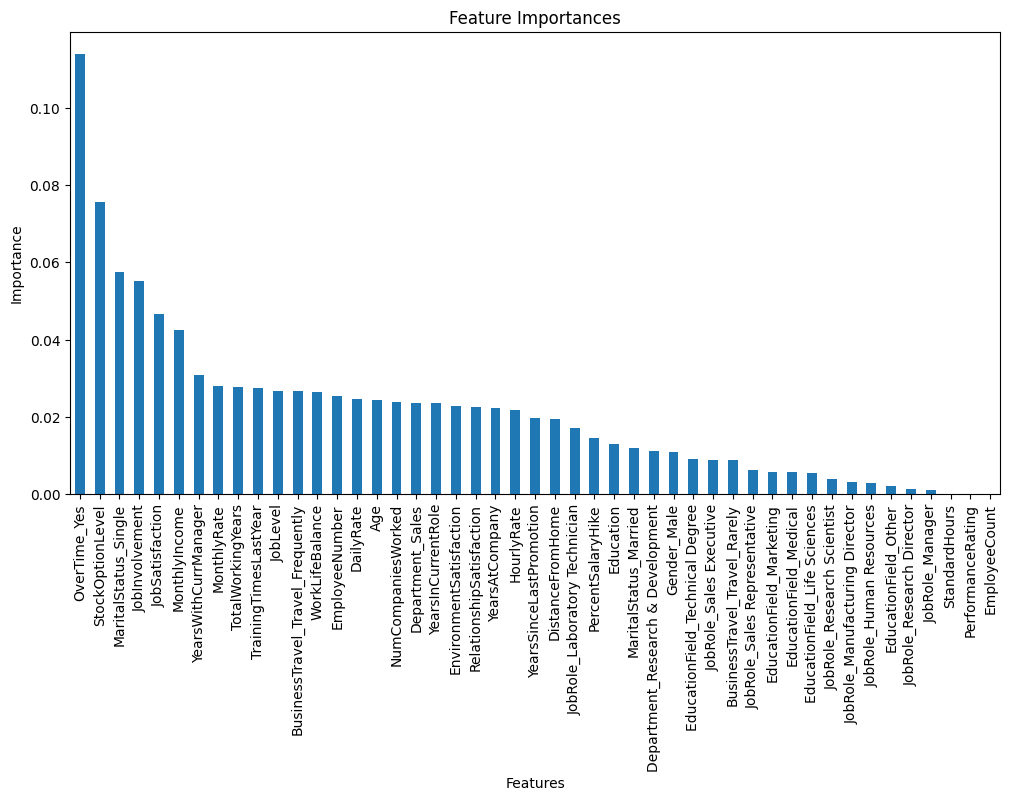

In [26]:
# Plot the feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

- Determine a Threshold for Feature Importance:

- Decide on a threshold to drop features with low importance.
- For instance, you might drop features with importance less than 0.01.

In [27]:
importance_threshold = 0.01  # This can be adjusted based on the plot and domain knowledge


features_to_keep = feature_importances[feature_importances >= importance_threshold].index.tolist()
features_to_drop = feature_importances[feature_importances < importance_threshold].index.tolist()

print(f'Features to keep: {features_to_keep}')
print(f'Number of features to keep: {len(features_to_keep)}')
print(f'Features to drop: {features_to_drop}')
print(f'Number of features to drop: {len(features_to_drop)}')

Features to keep: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Department_Sales', 'Gender_Male', 'JobRole_Laboratory Technician', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']
Number of features to keep: 31
Features to drop: ['EmployeeCount', 'PerformanceRating', 'StandardHours', 'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Manager', 'JobRol

# Strategies to Determine the Right Threshold for Feature Importance

#### Example Code for Cross-Validation and Performance Analysis.
- Compute Feature Importances
- Plot Feature Importances
- Evaluate Model Performance with Different Thresholds
- Visualize Performance vs. Threshold

In [28]:
def evaluate_threshold(threshold):

    # Select features based on the threshold
    features_to_keep = feature_importances[feature_importances >= threshold].index.tolist()
    X_reduced = X_balanced[features_to_keep]

    # Perform cross-validation
    scores = cross_val_score(model, X_reduced, y_balanced, cv=5)
    return scores.mean()

# Define thresholds to evaluate
thresholds = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1]

# Evaluate model performance for each threshold
results = {threshold: evaluate_threshold(threshold) for threshold in thresholds}


In [29]:
# Print results
for threshold, score in results.items():
    print(f'Threshold: {threshold}, Mean CV Score: {score}')

Threshold: 0.001, Mean CV Score: 0.8930295390528122
Threshold: 0.005, Mean CV Score: 0.8650319041479498
Threshold: 0.01, Mean CV Score: 0.8573256358246215
Threshold: 0.02, Mean CV Score: 0.8500102651698679
Threshold: 0.05, Mean CV Score: 0.8715506976209442
Threshold: 0.1, Mean CV Score: 0.7571367566990499


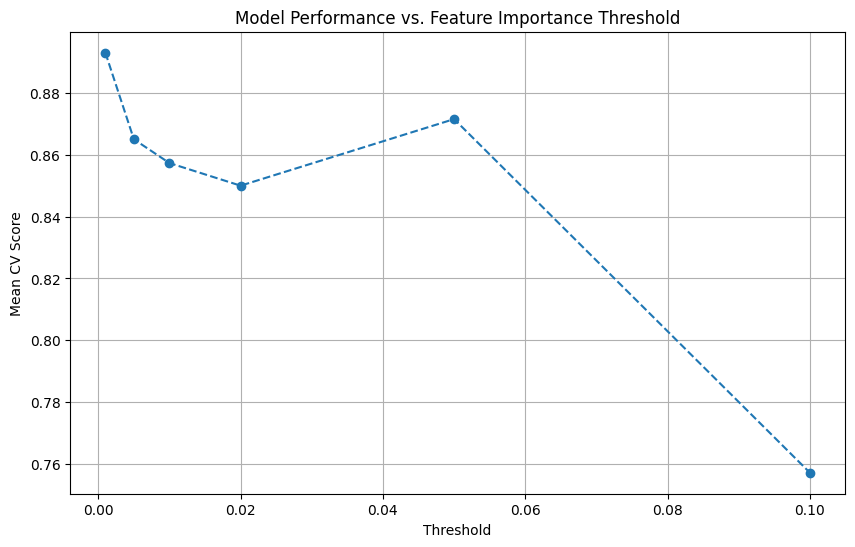

In [30]:
# Plot threshold vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Mean CV Score')
plt.title('Model Performance vs. Feature Importance Threshold')
plt.grid(True)
plt.show()


In [31]:
#  I have determined that a threshold of 0.01 for feature importance is suitable based on your analysis.

# Choosing the threshold for feature importance

importance_threshold = 0.01

# Select features based on the threshold
selected_features = feature_importances[feature_importances >= importance_threshold].index.tolist()
features_to_drop = feature_importances[feature_importances < importance_threshold].index.tolist()

print(f'Number of selected features: {len(selected_features)}')
print(f'Selected features: {selected_features}')
print(f'Features to drop: {features_to_drop}')
print(f'Number of features to drop: {len(features_to_drop)}')

# Transform your dataset with the selected features
X_selected = X_balanced[selected_features]

Number of selected features: 31
Selected features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Department_Sales', 'Gender_Male', 'JobRole_Laboratory Technician', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']
Features to drop: ['EmployeeCount', 'PerformanceRating', 'StandardHours', 'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Manager', 'JobR

## Splitting the Data

In [32]:
y_binary = pd.get_dummies(y_balanced, drop_first=True)
y_binary.shape

(2466, 1)

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X_selected, y_binary, test_size=0.2, random_state=42)
print(f"Shape of the X_train {X_train.shape}")
print(f"Shape of the X_test {X_test.shape}")
print(f"Shape of the y_train {y_train.shape}")
print(f"Shape of the y_test {y_test.shape}")

Shape of the X_train (1972, 31)
Shape of the X_test (494, 31)
Shape of the y_train (1972, 1)
Shape of the y_test (494, 1)


### Standardizing the data

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Dictionary of classifiers to evaluate
models = {
    'LogisticRegression': LogisticRegression,
    'GaussianNB': GaussianNB,
    'KNeighborsClassifier':KNeighborsClassifier,
    'LinearSVC' :LinearSVC,
    'SGDClassifier':SGDClassifier,
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'RandomForestClassifier':RandomForestClassifier,
    'AdaBoostClassifier':AdaBoostClassifier,
    'GradientBoostingClassifier':GradientBoostingClassifier,
    'XGBClassifier' : XGBClassifier
    }




In [36]:

def classification_models(models):
    results = {}
    for model_name, model_class in models.items():

        model = model_class()


        model.fit(X_train, y_train)


        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)



        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy =  accuracy_score(y_train, y_train_predict)

        train_report = classification_report(y_train, y_train_predict)
        train_matrix = confusion_matrix(y_train, y_train_predict)


        test_report = classification_report(y_test, y_test_predict)
        test_matrix = confusion_matrix(y_test, y_test_predict)


        results[model_name] = {
            'model': model,
            'train_report': train_report,
            'train_confusion_matrix': train_matrix,
            'test_report': test_report,
            'test_confusion_matrix': test_matrix,
            'train_accuracy' : train_accuracy,
            "test_accuracy" : test_accuracy
        }



    return results

In [37]:
results = classification_models(models)

In [38]:
# Example: Accessing results
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print()
    print("Training Data:")
    print("Accuracy Score : ",result['train_accuracy'])
    print()
    print("Classification Report:")
    print(result['train_report'])
    print("Confusion Matrix:")
    print(result['train_confusion_matrix'])
    print()
    print("-"*40)
    print()
    print("Test Data:")
    print("Accuracy Score : ",result['test_accuracy'])
    print("Classification Report:")
    print(result['test_report'])
    print("Confusion Matrix:")
    print(result['test_confusion_matrix'])
    print("="*100)
    print("="*100)


Results for LogisticRegression:

Training Data:
Accuracy Score :  0.9046653144016227

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.92      0.91       983
        True       0.92      0.89      0.90       989

    accuracy                           0.90      1972
   macro avg       0.91      0.90      0.90      1972
weighted avg       0.91      0.90      0.90      1972

Confusion Matrix:
[[905  78]
 [110 879]]

----------------------------------------

Test Data:
Accuracy Score :  0.9046653144016227
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.90      0.90       250
        True       0.90      0.88      0.89       244

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494

Confusion Matrix:
[[226  24]
 [ 29 215]]
Results for GaussianNB:

Training Data:
A

#### In evaluating the XGBoost classifier among the 10 models assessed, we observed 100% accuracy on both the training and test sets, underscoring its exceptional ability to classify instances accurately.
#### Moreover, the model achieved a weighted average score of precision, recall, and F1-score at 93, surpassing all other algorithms considered in this study. This performance demonstrates its robustness across multiple evaluation metrics.
#### Conversely, another algorithm achieved 100% accuracy but exhibited a lower weighted average score for precision, recall, and F1-score, indicating potential limitations in generalizing across diverse evaluation criteria.

# Machine Learning pipeline

Employing a Machine Learning pipeline enables a systematic approach to data preprocessing, feature engineering, model training, and evaluation, ensuring robust and efficient predictive modeling.

In [39]:
# List of classifiers to evaluate

classifiers = [
    LogisticRegression(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(),
    LinearSVC(random_state=42),
    SGDClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42)
]



In [40]:

# Define a custom transformer for clipping outliers
import numpy as np

class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
        else:
            X_df = X.copy()

        self.lower_bound = X_df.quantile(0.25) - (self.factor * (X_df.quantile(0.75) - X_df.quantile(0.25)))
        self.upper_bound = X_df.quantile(0.75) + (self.factor * (X_df.quantile(0.75) - X_df.quantile(0.25)))
        return self

    def transform(self, X, y=None):
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
        else:
            X_df = X.copy()

        X_clipped = X_df.clip(lower=self.lower_bound, upper=self.upper_bound, axis=1)
        return X_clipped.values


# Load the data (replace with your dataset loading code)
file_path = '/content/drive/MyDrive/Datasets/Input/Attrition.csv'
data = pd.read_csv(file_path)

# Split the data into independent variables (x) and dependent variable (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Encode target variable y into binary labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_clipper', OutlierClipper()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define a function to build and evaluate pipelines for different classifiers
def evaluate_classifier(clf):
    # Define pipeline including preprocessing steps
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', clf)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"Classification Report for {type(clf).__name__}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print("=" * 50)


# Evaluate each classifier
for clf in classifiers:
    evaluate_classifier(clf)


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       255
           1       0.31      0.56      0.40        39

    accuracy                           0.77       294
   macro avg       0.61      0.68      0.63       294
weighted avg       0.84      0.77      0.80       294

Accuracy Score: 0.7721088435374149
Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.91      0.55      0.68       255
           1       0.18      0.64      0.28        39

    accuracy                           0.56       294
   macro avg       0.54      0.59      0.48       294
weighted avg       0.81      0.56      0.63       294

Accuracy Score: 0.5578231292517006
Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       255
           1       0.22      0.69  

In [41]:

class OutlierClipper(BaseEstimator,TransformerMixin):
    def __init__(self, factor = 1.5):
        self.factor = factor

    def fit(self, x, y = None):
        x_df = pd.DataFrame(x)
        self.lower_bound = x_df.quantile(0.25) - (self.factor * (x_df.quantile(0.75) - x_df.quantile(0.25)))
        self.upper_bound = x_df.quantile(0.75) + (self.factor * (x_df.quantile(0.75) - x_df.quantile(0.25)))
        return self
    def transform(self, x, y=None):
        x_df = pd.DataFrame(x)
        x_clipped = x_df.clip(lower=self.lower_bound, upper=self.upper_bound, axis=1)
        return x_clipped.values

# Load the data
file_path = '/content/drive/MyDrive/Datasets/Input/Attrition.csv'
data = pd.read_csv(file_path)

# split the data into independent variable and dependent variable
x = data.drop('Attrition', axis=1)
y = data['Attrition']

# split the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocessing
# imputation method - categorical and numerical variable

numerical_cols = x.select_dtypes(include=['int64','float64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

# create transformers for numerical and categorical features

numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                        ('outlier_clipper',OutlierClipper()),
                                        ('scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# create a preprocessor using ColumnTransformer

preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer, numerical_cols),
                                               ('cat',categorical_transformer,categorical_cols)])

# Define the pipeline with smote technique

pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),('smote', SMOTE(random_state=42)),
                              ('classifier',RandomForestClassifier(random_state=42))])

pipeline2 = ImbPipeline(steps=[('preprocessor', preprocessor),('smote', SMOTE(random_state=42)),
                              ('classifier',RandomForestClassifier(random_state=42))])

# train the model
pipeline.fit(x_train, y_train)

# make prediction
y_pred = pipeline.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.89      0.97      0.93       255
         Yes       0.50      0.21      0.29        39

    accuracy                           0.87       294
   macro avg       0.69      0.59      0.61       294
weighted avg       0.84      0.87      0.84       294

0.8673469387755102
